In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")
df=pd.concat([data,test],axis=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [4]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [5]:
df["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [6]:
df["Gender"].replace(np.nan,"Male",inplace=True)
df["Married"].replace(np.nan,"Yes",inplace=True)
df["Dependents"].replace(np.nan,"0",inplace=True)
df["Self_Employed"].replace(np.nan,"No",inplace=True)
df["LoanAmount"].replace(np.nan,df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].replace(np.nan,df["Loan_Amount_Term"].median(),inplace=True)
df["Credit_History"].replace(np.nan,df["Credit_History"].median(),inplace=True)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [31]:
df["Dependents"].replace(["0","1","2","3+"],[0,1,2,3],inplace=True)

In [13]:
df["Dependents"].astype(int)

ValueError: invalid literal for int() with base 10: '3+'

In [16]:
x=pd.get_dummies(df,columns=["Dependents","Property_Area"])
x

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,1,0,1,5849,0.0,126.0,360.0,1.0,Y,1,0,0,0,0,0,1
1,LP001003,0,0,0,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,0,1,0,0
2,LP001005,0,0,0,0,3000,0.0,66.0,360.0,1.0,Y,1,0,0,0,0,0,1
3,LP001006,0,0,1,1,2583,2358.0,120.0,360.0,1.0,Y,1,0,0,0,0,0,1
4,LP001008,0,1,0,1,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,0,1,0,4009,1777.0,113.0,360.0,1.0,NaN,0,0,0,1,0,0,1
363,LP002975,0,0,0,1,4158,709.0,115.0,360.0,1.0,NaN,1,0,0,0,0,0,1
364,LP002980,0,1,0,1,3250,1993.0,126.0,360.0,1.0,NaN,1,0,0,0,0,1,0
365,LP002986,0,0,0,1,5000,2393.0,158.0,360.0,1.0,NaN,1,0,0,0,1,0,0


In [34]:
df["Property_Area"].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [37]:
df["Property_Area"].replace(["Urban","Semiurban","Rural"],[0,1,2],inplace=True)
df["Property_Area"].astype(int)

0      0
1      2
2      0
3      0
4      0
      ..
362    0
363    0
364    1
365    2
366    2
Name: Property_Area, Length: 981, dtype: int32

In [48]:
df["Self_Employed"].value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [9]:
df["Gender"].replace(["Male","Female"],[0,1],inplace=True)
df["Gender"].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
362    0
363    0
364    0
365    0
366    0
Name: Gender, Length: 981, dtype: int32

In [10]:
df["Married"].replace(["Yes","No"],[0,1],inplace=True)
df["Married"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
362    0
363    0
364    1
365    0
366    1
Name: Married, Length: 981, dtype: int32

In [11]:
df["Education"].replace(["Graduate","Not Graduate"],[0,1],inplace=True)
df["Education"].astype(int)

0      0
1      0
2      0
3      1
4      0
      ..
362    1
363    0
364    0
365    0
366    0
Name: Education, Length: 981, dtype: int32

In [12]:
df["Self_Employed"].replace(["Yes","No"],[0,1],inplace=True)
df["Self_Employed"].astype(int)

0      1
1      1
2      0
3      1
4      1
      ..
362    0
363    1
364    1
365    1
366    0
Name: Self_Employed, Length: 981, dtype: int32

In [71]:
train=df.iloc[0:614]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 67.2+ KB


In [66]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,126.0,360.0,1.0,0,Y
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,Y
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,Y
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,Y


In [69]:
test2=df.iloc[614:981]

In [93]:

test2.drop("Loan_Status",axis=1,inplace=True)
test2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 37.3+ KB


C:\Users\umesh\AppData\Local\Temp\ipykernel_6936\2601108423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.drop("Loan_Status",axis=1,inplace=True)


In [72]:
train.drop("Loan_ID",axis=1,inplace=True)
train["Loan_Status"].replace(["Y","N"],[0,1],inplace=True)

C:\Users\umesh\AppData\Local\Temp\ipykernel_6936\516111154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop("Loan_ID",axis=1,inplace=True)
C:\Users\umesh\AppData\Local\Temp\ipykernel_6936\516111154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Loan_Status"].replace(["Y","N"],[0,1],inplace=True)


In [76]:
train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.172914,-0.045364,-0.000525,-0.058809,-0.082912,-0.106782,0.074030,-0.009170,-0.025752,0.017987
Married,0.364569,1.000000,-0.334216,-0.012304,0.004489,-0.051708,-0.075948,-0.146466,0.100912,-0.010938,0.004257,0.091478
Dependents,-0.172914,-0.334216,1.000000,0.055752,-0.056798,0.118202,0.030430,0.163086,-0.103864,-0.040160,0.000244,-0.010118
Education,-0.045364,-0.012304,0.055752,1.000000,0.010383,-0.140760,-0.062290,-0.168933,-0.073928,-0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,-0.056798,0.010383,1.000000,-0.127180,0.016100,-0.115071,0.033739,0.001550,-0.030860,-0.003700
ApplicantIncome,-0.058809,-0.051708,0.118202,-0.140760,-0.127180,1.000000,-0.116605,0.565076,-0.046531,-0.018615,0.009500,0.004710
CoapplicantIncome,-0.082912,-0.075948,0.030430,-0.062290,0.016100,-0.116605,1.000000,0.189350,-0.059383,0.011134,-0.010522,0.059187
LoanAmount,-0.106782,-0.146466,0.163086,-0.168933,-0.115071,0.565076,0.189350,1.000000,0.037009,-0.000518,0.046829,0.032864
Loan_Amount_Term,0.074030,0.100912,-0.103864,-0.073928,0.033739,-0.046531,-0.059383,0.037009,1.000000,-0.004705,0.076120,0.022549
Credit_History,-0.009170,-0.010938,-0.040160,-0.073658,0.001550,-0.018615,0.011134,-0.000518,-0.004705,1.000000,-0.001963,-0.540556


In [74]:
x=train.drop("Loan_Status",axis=1)
y=train["Loan_Status"]

In [77]:
from sklearn.model_selection import train_test_split
Xtr,Xte,Ytr,Yte=train_test_split(x,y,test_size=0.33,random_state=1)

In [78]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight={1:0.1,0:0.2})
model.fit(Xtr,Ytr)
score_log=model.score(Xte,Yte)
ypr=model.predict(Xte)
print(score_log)

0.7192118226600985


In [79]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(Xtr,Ytr)
model.score(Xte,Yte)

0.7635467980295566

In [80]:
from sklearn.model_selection import GridSearchCV,KFold
fold=KFold(n_splits=4)

In [81]:
model_rf=RandomForestClassifier(random_state=1,class_weight="balanced")
para={"max_depth":[5,10,15,20],
      "n_estimators":[25,50,75],
    "max_features":[5,7,9,10]
}
grid_rf=GridSearchCV(model_rf,param_grid=para,cv=fold,verbose=1)

In [82]:
grid_rf.fit(Xtr,Ytr)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 7, 9, 10],
                         'n_estimators': [25, 50, 75]},
             verbose=1)

In [83]:
print(grid_rf.best_estimator_)
print(grid_rf.score(Xte,Yte))

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=7,
                       n_estimators=50, random_state=1)
0.7733990147783252


In [84]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbt=GradientBoostingClassifier(random_state=1)
para_gb={"n_estimators":[50,75,100],
        "max_depth":[2,3,4],
        "learning_rate":[0.1,0.075,0.05]}
grid_gbt=GridSearchCV(model_gbt,param_grid=para_gb,cv=fold,verbose=1)
grid_gbt.fit(Xtr,Ytr)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.1, 0.075, 0.05],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 75, 100]},
             verbose=1)

In [85]:
print(grid_gbt.best_estimator_)
print(grid_gbt.score(Xte,Yte))

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=50,
                           random_state=1)
0.7684729064039408


In [86]:
from sklearn.metrics import confusion_matrix,classification_report
ypred=grid_rf.predict(Xte)
print(classification_report(Yte,ypred))
ypr_gb=grid_gbt.predict(Xte)
print(classification_report(Yte,ypr_gb))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       132
           1       0.88      0.41      0.56        71

    accuracy                           0.77       203
   macro avg       0.82      0.69      0.70       203
weighted avg       0.80      0.77      0.75       203

              precision    recall  f1-score   support

           0       0.75      0.97      0.84       132
           1       0.88      0.39      0.54        71

    accuracy                           0.77       203
   macro avg       0.81      0.68      0.69       203
weighted avg       0.79      0.77      0.74       203



In [87]:
import xgboost as xgb
xgc=xgb.XGBClassifier( objective='binary:logistic')
para_xgc={
         "n_estimators":[50,75,150],
         "eta":[0.1,0.05],
         "max_depth":[4,5]}
grid_xgc=GridSearchCV(xgc,param_grid=para_xgc,cv=fold)

In [90]:
grid_xgc.fit(Xtr,Ytr,eval_set=[(Xtr,Ytr),(Xte,Yte)],eval_metric=['logloss','error'])

[0]	validation_0-logloss:0.65078	validation_0-error:0.16302	validation_1-logloss:0.66048	validation_1-error:0.23153
[1]	validation_0-logloss:0.61654	validation_0-error:0.16545	validation_1-logloss:0.63379	validation_1-error:0.23153
[2]	validation_0-logloss:0.58819	validation_0-error:0.16545	validation_1-logloss:0.61224	validation_1-error:0.23153
[3]	validation_0-logloss:0.56313	validation_0-error:0.16302	validation_1-logloss:0.59479	validation_1-error:0.22660
[4]	validation_0-logloss:0.54160	validation_0-error:0.16545	validation_1-logloss:0.58029	validation_1-error:0.22660
[5]	validation_0-logloss:0.52438	validation_0-error:0.16788	validation_1-logloss:0.56854	validation_1-error:0.22660
[6]	validation_0-logloss:0.50847	validation_0-error:0.16302	validation_1-logloss:0.55854	validation_1-error:0.22660
[7]	validation_0-logloss:0.49527	validation_0-error:0.16545	validation_1-logloss:0.55013	validation_1-error:0.22660
[8]	validation_0-logloss:0.48225	validation_0-error:0.16545	validation_1

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.34655	validation_0-error:0.14842	validation_1-logloss:0.51936	validation_1-error:0.22660
[42]	validation_0-logloss:0.34524	validation_0-error:0.14599	validation_1-logloss:0.51923	validation_1-error:0.22660
[43]	validation_0-logloss:0.34074	validation_0-error:0.14355	validation_1-logloss:0.51845	validation_1-error:0.22167
[44]	validation_0-logloss:0.33916	validation_0-error:0.14112	validation_1-logloss:0.51889	validation_1-error:0.22167
[45]	validation_0-logloss:0.33839	validation_0-error:0.14112	validation_1-logloss:0.51874	validation_1-error:0.22167
[46]	validation_0-logloss:0.33598	validation_0-error:0.13625	validation_1-logloss:0.51931	validation_1-error:0.22167
[47]	validation_0-logloss:0.33208	validation_0-error:0.13869	validation_1-logloss:0.52150	validation_1-error:0.22167
[48]	validation_0-logloss:0.32879	validation_0-error:0.13869	validation_1-logloss:0.52151	validation_1-error:0.22167
[49]	validation_0-logloss:0.32702	validation_0-error:0.13625	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-logloss:0.32468	validation_0-error:0.12165	validation_1-logloss:0.55179	validation_1-error:0.23153
[47]	validation_0-logloss:0.32287	validation_0-error:0.11922	validation_1-logloss:0.55292	validation_1-error:0.23645
[48]	validation_0-logloss:0.32081	validation_0-error:0.11922	validation_1-logloss:0.55288	validation_1-error:0.24138
[49]	validation_0-logloss:0.31870	validation_0-error:0.11922	validation_1-logloss:0.55536	validation_1-error:0.23645
[0]	validation_0-logloss:0.65041	validation_0-error:0.16545	validation_1-logloss:0.66078	validation_1-error:0.24138
[1]	validation_0-logloss:0.61539	validation_0-error:0.16302	validation_1-logloss:0.63509	validation_1-error:0.23645
[2]	validation_0-logloss:0.58627	validation_0-error:0.16302	validation_1-logloss:0.61568	validation_1-error:0.23645
[3]	validation_0-logloss:0.56169	validation_0-error:0.16545	validation_1-logloss:0.59827	validation_1-error:0.24138
[4]	validation_0-logloss:0.54124	validation_0-error:0.16788	validati

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-logloss:0.33489	validation_0-error:0.14112	validation_1-logloss:0.57557	validation_1-error:0.23153
[46]	validation_0-logloss:0.33336	validation_0-error:0.13139	validation_1-logloss:0.57714	validation_1-error:0.23153
[47]	validation_0-logloss:0.33195	validation_0-error:0.13869	validation_1-logloss:0.57704	validation_1-error:0.23153
[48]	validation_0-logloss:0.33102	validation_0-error:0.14112	validation_1-logloss:0.57759	validation_1-error:0.23153
[49]	validation_0-logloss:0.32888	validation_0-error:0.12895	validation_1-logloss:0.57948	validation_1-error:0.23153
[0]	validation_0-logloss:0.64935	validation_0-error:0.17032	validation_1-logloss:0.65932	validation_1-error:0.23645
[1]	validation_0-logloss:0.61351	validation_0-error:0.17032	validation_1-logloss:0.63257	validation_1-error:0.23645
[2]	validation_0-logloss:0.58408	validation_0-error:0.17032	validation_1-logloss:0.61012	validation_1-error:0.23645
[3]	validation_0-logloss:0.55860	validation_0-error:0.17032	validat

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-logloss:0.32704	validation_0-error:0.13625	validation_1-logloss:0.54933	validation_1-error:0.24138
[48]	validation_0-logloss:0.32618	validation_0-error:0.12895	validation_1-logloss:0.54990	validation_1-error:0.24138
[49]	validation_0-logloss:0.32498	validation_0-error:0.13139	validation_1-logloss:0.55177	validation_1-error:0.24138
[0]	validation_0-logloss:0.65078	validation_0-error:0.16302	validation_1-logloss:0.66048	validation_1-error:0.23153
[1]	validation_0-logloss:0.61654	validation_0-error:0.16545	validation_1-logloss:0.63379	validation_1-error:0.23153
[2]	validation_0-logloss:0.58819	validation_0-error:0.16545	validation_1-logloss:0.61224	validation_1-error:0.23153
[3]	validation_0-logloss:0.56313	validation_0-error:0.16302	validation_1-logloss:0.59479	validation_1-error:0.22660
[4]	validation_0-logloss:0.54160	validation_0-error:0.16545	validation_1-logloss:0.58029	validation_1-error:0.22660
[5]	validation_0-logloss:0.52438	validation_0-error:0.16788	validatio

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.34655	validation_0-error:0.14842	validation_1-logloss:0.51936	validation_1-error:0.22660
[42]	validation_0-logloss:0.34524	validation_0-error:0.14599	validation_1-logloss:0.51923	validation_1-error:0.22660
[43]	validation_0-logloss:0.34074	validation_0-error:0.14355	validation_1-logloss:0.51845	validation_1-error:0.22167
[44]	validation_0-logloss:0.33916	validation_0-error:0.14112	validation_1-logloss:0.51889	validation_1-error:0.22167
[45]	validation_0-logloss:0.33839	validation_0-error:0.14112	validation_1-logloss:0.51874	validation_1-error:0.22167
[46]	validation_0-logloss:0.33598	validation_0-error:0.13625	validation_1-logloss:0.51931	validation_1-error:0.22167
[47]	validation_0-logloss:0.33208	validation_0-error:0.13869	validation_1-logloss:0.52150	validation_1-error:0.22167
[48]	validation_0-logloss:0.32879	validation_0-error:0.13869	validation_1-logloss:0.52151	validation_1-error:0.22167
[49]	validation_0-logloss:0.32702	validation_0-error:0.13625	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.34744	validation_0-error:0.13382	validation_1-logloss:0.54251	validation_1-error:0.22660
[36]	validation_0-logloss:0.34441	validation_0-error:0.13382	validation_1-logloss:0.54187	validation_1-error:0.22660
[37]	validation_0-logloss:0.34103	validation_0-error:0.13382	validation_1-logloss:0.54256	validation_1-error:0.22660
[38]	validation_0-logloss:0.33938	validation_0-error:0.13139	validation_1-logloss:0.54412	validation_1-error:0.22660
[39]	validation_0-logloss:0.33622	validation_0-error:0.12895	validation_1-logloss:0.54501	validation_1-error:0.22660
[40]	validation_0-logloss:0.33485	validation_0-error:0.12652	validation_1-logloss:0.54561	validation_1-error:0.22660
[41]	validation_0-logloss:0.33195	validation_0-error:0.12895	validation_1-logloss:0.54580	validation_1-error:0.22660
[42]	validation_0-logloss:0.33080	validation_0-error:0.12652	validation_1-logloss:0.54720	validation_1-error:0.22660
[43]	validation_0-logloss:0.32943	validation_0-error:0.12652	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.34755	validation_0-error:0.13869	validation_1-logloss:0.57666	validation_1-error:0.23153
[39]	validation_0-logloss:0.34480	validation_0-error:0.13869	validation_1-logloss:0.57633	validation_1-error:0.23153
[40]	validation_0-logloss:0.34247	validation_0-error:0.13869	validation_1-logloss:0.57440	validation_1-error:0.23153
[41]	validation_0-logloss:0.34048	validation_0-error:0.13869	validation_1-logloss:0.57277	validation_1-error:0.23153
[42]	validation_0-logloss:0.33899	validation_0-error:0.13869	validation_1-logloss:0.57328	validation_1-error:0.23153
[43]	validation_0-logloss:0.33784	validation_0-error:0.13869	validation_1-logloss:0.57424	validation_1-error:0.23153
[44]	validation_0-logloss:0.33630	validation_0-error:0.13382	validation_1-logloss:0.57524	validation_1-error:0.23153
[45]	validation_0-logloss:0.33489	validation_0-error:0.14112	validation_1-logloss:0.57557	validation_1-error:0.23153
[46]	validation_0-logloss:0.33336	validation_0-error:0.13139	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-logloss:0.33215	validation_0-error:0.14112	validation_1-logloss:0.54823	validation_1-error:0.24138
[46]	validation_0-logloss:0.32836	validation_0-error:0.13625	validation_1-logloss:0.54890	validation_1-error:0.24138
[47]	validation_0-logloss:0.32704	validation_0-error:0.13625	validation_1-logloss:0.54933	validation_1-error:0.24138
[48]	validation_0-logloss:0.32618	validation_0-error:0.12895	validation_1-logloss:0.54990	validation_1-error:0.24138
[49]	validation_0-logloss:0.32498	validation_0-error:0.13139	validation_1-logloss:0.55177	validation_1-error:0.24138
[50]	validation_0-logloss:0.32353	validation_0-error:0.13139	validation_1-logloss:0.55220	validation_1-error:0.24138
[51]	validation_0-logloss:0.32099	validation_0-error:0.13139	validation_1-logloss:0.55231	validation_1-error:0.24138
[52]	validation_0-logloss:0.32011	validation_0-error:0.13139	validation_1-logloss:0.55292	validation_1-error:0.24138
[53]	validation_0-logloss:0.31751	validation_0-error:0.13139	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-logloss:0.33208	validation_0-error:0.13869	validation_1-logloss:0.52150	validation_1-error:0.22167
[48]	validation_0-logloss:0.32879	validation_0-error:0.13869	validation_1-logloss:0.52151	validation_1-error:0.22167
[49]	validation_0-logloss:0.32702	validation_0-error:0.13625	validation_1-logloss:0.52313	validation_1-error:0.22660
[50]	validation_0-logloss:0.32404	validation_0-error:0.13625	validation_1-logloss:0.52533	validation_1-error:0.22660
[51]	validation_0-logloss:0.31979	validation_0-error:0.13139	validation_1-logloss:0.52452	validation_1-error:0.23153
[52]	validation_0-logloss:0.31644	validation_0-error:0.12895	validation_1-logloss:0.52512	validation_1-error:0.23153
[53]	validation_0-logloss:0.31525	validation_0-error:0.12895	validation_1-logloss:0.52551	validation_1-error:0.23153
[54]	validation_0-logloss:0.31435	validation_0-error:0.12895	validation_1-logloss:0.52593	validation_1-error:0.23153
[55]	validation_0-logloss:0.31351	validation_0-error:0.12652	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-logloss:0.32753	validation_0-error:0.12409	validation_1-logloss:0.54702	validation_1-error:0.22660
[45]	validation_0-logloss:0.32630	validation_0-error:0.12165	validation_1-logloss:0.54935	validation_1-error:0.22660
[46]	validation_0-logloss:0.32468	validation_0-error:0.12165	validation_1-logloss:0.55179	validation_1-error:0.23153
[47]	validation_0-logloss:0.32287	validation_0-error:0.11922	validation_1-logloss:0.55292	validation_1-error:0.23645
[48]	validation_0-logloss:0.32081	validation_0-error:0.11922	validation_1-logloss:0.55288	validation_1-error:0.24138
[49]	validation_0-logloss:0.31870	validation_0-error:0.11922	validation_1-logloss:0.55536	validation_1-error:0.23645
[50]	validation_0-logloss:0.31719	validation_0-error:0.11922	validation_1-logloss:0.55655	validation_1-error:0.23645
[51]	validation_0-logloss:0.31648	validation_0-error:0.11922	validation_1-logloss:0.55749	validation_1-error:0.24138
[52]	validation_0-logloss:0.31406	validation_0-error:0.11436	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-logloss:0.33630	validation_0-error:0.13382	validation_1-logloss:0.57524	validation_1-error:0.23153
[45]	validation_0-logloss:0.33489	validation_0-error:0.14112	validation_1-logloss:0.57557	validation_1-error:0.23153
[46]	validation_0-logloss:0.33336	validation_0-error:0.13139	validation_1-logloss:0.57714	validation_1-error:0.23153
[47]	validation_0-logloss:0.33195	validation_0-error:0.13869	validation_1-logloss:0.57704	validation_1-error:0.23153
[48]	validation_0-logloss:0.33102	validation_0-error:0.14112	validation_1-logloss:0.57759	validation_1-error:0.23153
[49]	validation_0-logloss:0.32888	validation_0-error:0.12895	validation_1-logloss:0.57948	validation_1-error:0.23153
[50]	validation_0-logloss:0.32662	validation_0-error:0.12895	validation_1-logloss:0.58091	validation_1-error:0.23153
[51]	validation_0-logloss:0.32522	validation_0-error:0.12895	validation_1-logloss:0.58073	validation_1-error:0.23153
[52]	validation_0-logloss:0.32238	validation_0-error:0.13139	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-logloss:0.32498	validation_0-error:0.13139	validation_1-logloss:0.55177	validation_1-error:0.24138
[50]	validation_0-logloss:0.32353	validation_0-error:0.13139	validation_1-logloss:0.55220	validation_1-error:0.24138
[51]	validation_0-logloss:0.32099	validation_0-error:0.13139	validation_1-logloss:0.55231	validation_1-error:0.24138
[52]	validation_0-logloss:0.32011	validation_0-error:0.13139	validation_1-logloss:0.55292	validation_1-error:0.24138
[53]	validation_0-logloss:0.31751	validation_0-error:0.13139	validation_1-logloss:0.55216	validation_1-error:0.24631
[54]	validation_0-logloss:0.31693	validation_0-error:0.12652	validation_1-logloss:0.55263	validation_1-error:0.24631
[55]	validation_0-logloss:0.31579	validation_0-error:0.12652	validation_1-logloss:0.55313	validation_1-error:0.24138
[56]	validation_0-logloss:0.31368	validation_0-error:0.12409	validation_1-logloss:0.55356	validation_1-error:0.24138
[57]	validation_0-logloss:0.31101	validation_0-error:0.12409	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.31192	validation_0-error:0.12652	validation_1-logloss:0.52183	validation_1-error:0.23153
[42]	validation_0-logloss:0.30823	validation_0-error:0.11679	validation_1-logloss:0.52171	validation_1-error:0.23645
[43]	validation_0-logloss:0.30650	validation_0-error:0.11922	validation_1-logloss:0.52351	validation_1-error:0.24138
[44]	validation_0-logloss:0.30282	validation_0-error:0.11192	validation_1-logloss:0.52483	validation_1-error:0.24631
[45]	validation_0-logloss:0.30217	validation_0-error:0.11192	validation_1-logloss:0.52542	validation_1-error:0.24631
[46]	validation_0-logloss:0.29900	validation_0-error:0.11436	validation_1-logloss:0.52647	validation_1-error:0.24631
[47]	validation_0-logloss:0.29740	validation_0-error:0.11436	validation_1-logloss:0.52800	validation_1-error:0.24631
[48]	validation_0-logloss:0.29586	validation_0-error:0.10949	validation_1-logloss:0.52859	validation_1-error:0.24631
[49]	validation_0-logloss:0.29463	validation_0-error:0.10949	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-logloss:0.28564	validation_0-error:0.09732	validation_1-logloss:0.61541	validation_1-error:0.25123
[49]	validation_0-logloss:0.28405	validation_0-error:0.09489	validation_1-logloss:0.61748	validation_1-error:0.25123
[0]	validation_0-logloss:0.64908	validation_0-error:0.15815	validation_1-logloss:0.65986	validation_1-error:0.25123
[1]	validation_0-logloss:0.61351	validation_0-error:0.16545	validation_1-logloss:0.63499	validation_1-error:0.24631
[2]	validation_0-logloss:0.58467	validation_0-error:0.16302	validation_1-logloss:0.61571	validation_1-error:0.24138
[3]	validation_0-logloss:0.55998	validation_0-error:0.16545	validation_1-logloss:0.59778	validation_1-error:0.24138
[4]	validation_0-logloss:0.53770	validation_0-error:0.16788	validation_1-logloss:0.58400	validation_1-error:0.24138
[5]	validation_0-logloss:0.51973	validation_0-error:0.16545	validation_1-logloss:0.57352	validation_1-error:0.24138
[6]	validation_0-logloss:0.50231	validation_0-error:0.16302	validation

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-logloss:0.28768	validation_0-error:0.11192	validation_1-logloss:0.58520	validation_1-error:0.24631
[47]	validation_0-logloss:0.28554	validation_0-error:0.10949	validation_1-logloss:0.58662	validation_1-error:0.24631
[48]	validation_0-logloss:0.28371	validation_0-error:0.10949	validation_1-logloss:0.58626	validation_1-error:0.24631
[49]	validation_0-logloss:0.28203	validation_0-error:0.10706	validation_1-logloss:0.58654	validation_1-error:0.24631
[0]	validation_0-logloss:0.64917	validation_0-error:0.18005	validation_1-logloss:0.65761	validation_1-error:0.23645
[1]	validation_0-logloss:0.61233	validation_0-error:0.17032	validation_1-logloss:0.62954	validation_1-error:0.22660
[2]	validation_0-logloss:0.58182	validation_0-error:0.17032	validation_1-logloss:0.60602	validation_1-error:0.22660
[3]	validation_0-logloss:0.55534	validation_0-error:0.17032	validation_1-logloss:0.58893	validation_1-error:0.22660
[4]	validation_0-logloss:0.53376	validation_0-error:0.17032	validati

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-logloss:0.30093	validation_0-error:0.11192	validation_1-logloss:0.54956	validation_1-error:0.23645
[46]	validation_0-logloss:0.29878	validation_0-error:0.11436	validation_1-logloss:0.55108	validation_1-error:0.23645
[47]	validation_0-logloss:0.29769	validation_0-error:0.11436	validation_1-logloss:0.55186	validation_1-error:0.23645
[48]	validation_0-logloss:0.29659	validation_0-error:0.11192	validation_1-logloss:0.55199	validation_1-error:0.23645
[49]	validation_0-logloss:0.29440	validation_0-error:0.10949	validation_1-logloss:0.55366	validation_1-error:0.23645
[0]	validation_0-logloss:0.64949	validation_0-error:0.16058	validation_1-logloss:0.65880	validation_1-error:0.23645
[1]	validation_0-logloss:0.61491	validation_0-error:0.16302	validation_1-logloss:0.63145	validation_1-error:0.23153
[2]	validation_0-logloss:0.58598	validation_0-error:0.16302	validation_1-logloss:0.61061	validation_1-error:0.23153
[3]	validation_0-logloss:0.56185	validation_0-error:0.16302	validat

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-logloss:0.29900	validation_0-error:0.11436	validation_1-logloss:0.52647	validation_1-error:0.24631
[47]	validation_0-logloss:0.29740	validation_0-error:0.11436	validation_1-logloss:0.52800	validation_1-error:0.24631
[48]	validation_0-logloss:0.29586	validation_0-error:0.10949	validation_1-logloss:0.52859	validation_1-error:0.24631
[49]	validation_0-logloss:0.29463	validation_0-error:0.10949	validation_1-logloss:0.52925	validation_1-error:0.23645
[50]	validation_0-logloss:0.29291	validation_0-error:0.10949	validation_1-logloss:0.53000	validation_1-error:0.24138
[51]	validation_0-logloss:0.29020	validation_0-error:0.10949	validation_1-logloss:0.53134	validation_1-error:0.24631
[52]	validation_0-logloss:0.28868	validation_0-error:0.10949	validation_1-logloss:0.53289	validation_1-error:0.24631
[53]	validation_0-logloss:0.28799	validation_0-error:0.10706	validation_1-logloss:0.53330	validation_1-error:0.24631
[54]	validation_0-logloss:0.28534	validation_0-error:0.10462	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



[46]	validation_0-logloss:0.28783	validation_0-error:0.09732	validation_1-logloss:0.61190	validation_1-error:0.25123
[47]	validation_0-logloss:0.28709	validation_0-error:0.09732	validation_1-logloss:0.61226	validation_1-error:0.25616
[48]	validation_0-logloss:0.28564	validation_0-error:0.09732	validation_1-logloss:0.61541	validation_1-error:0.25123
[49]	validation_0-logloss:0.28405	validation_0-error:0.09489	validation_1-logloss:0.61748	validation_1-error:0.25123
[50]	validation_0-logloss:0.28289	validation_0-error:0.09732	validation_1-logloss:0.62111	validation_1-error:0.25616
[51]	validation_0-logloss:0.28169	validation_0-error:0.09002	validation_1-logloss:0.61964	validation_1-error:0.25616
[52]	validation_0-logloss:0.28016	validation_0-error:0.09002	validation_1-logloss:0.62223	validation_1-error:0.25616
[53]	validation_0-logloss:0.27906	validation_0-error:0.09002	validation_1-logloss:0.62329	validation_1-error:0.26108
[54]	validation_0-logloss:0.27773	validation_0-error:0.09002	va

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-logloss:0.28554	validation_0-error:0.10949	validation_1-logloss:0.58662	validation_1-error:0.24631
[48]	validation_0-logloss:0.28371	validation_0-error:0.10949	validation_1-logloss:0.58626	validation_1-error:0.24631
[49]	validation_0-logloss:0.28203	validation_0-error:0.10706	validation_1-logloss:0.58654	validation_1-error:0.24631
[50]	validation_0-logloss:0.27898	validation_0-error:0.10219	validation_1-logloss:0.59091	validation_1-error:0.24138
[51]	validation_0-logloss:0.27736	validation_0-error:0.09976	validation_1-logloss:0.59188	validation_1-error:0.24138
[52]	validation_0-logloss:0.27527	validation_0-error:0.10219	validation_1-logloss:0.59311	validation_1-error:0.24138
[53]	validation_0-logloss:0.27138	validation_0-error:0.09732	validation_1-logloss:0.59459	validation_1-error:0.24138
[54]	validation_0-logloss:0.27030	validation_0-error:0.09732	validation_1-logloss:0.59742	validation_1-error:0.24138
[55]	validation_0-logloss:0.26935	validation_0-error:0.09489	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-logloss:0.29659	validation_0-error:0.11192	validation_1-logloss:0.55199	validation_1-error:0.23645
[49]	validation_0-logloss:0.29440	validation_0-error:0.10949	validation_1-logloss:0.55366	validation_1-error:0.23645
[50]	validation_0-logloss:0.29387	validation_0-error:0.10949	validation_1-logloss:0.55452	validation_1-error:0.23645
[51]	validation_0-logloss:0.29173	validation_0-error:0.10949	validation_1-logloss:0.55654	validation_1-error:0.23645
[52]	validation_0-logloss:0.29036	validation_0-error:0.10706	validation_1-logloss:0.55883	validation_1-error:0.23645
[53]	validation_0-logloss:0.28995	validation_0-error:0.10706	validation_1-logloss:0.55978	validation_1-error:0.23153
[54]	validation_0-logloss:0.28844	validation_0-error:0.10462	validation_1-logloss:0.56036	validation_1-error:0.23153
[55]	validation_0-logloss:0.28694	validation_0-error:0.10462	validation_1-logloss:0.56338	validation_1-error:0.23153
[56]	validation_0-logloss:0.28526	validation_0-error:0.10462	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-logloss:0.29291	validation_0-error:0.10949	validation_1-logloss:0.53000	validation_1-error:0.24138
[51]	validation_0-logloss:0.29020	validation_0-error:0.10949	validation_1-logloss:0.53134	validation_1-error:0.24631
[52]	validation_0-logloss:0.28868	validation_0-error:0.10949	validation_1-logloss:0.53289	validation_1-error:0.24631
[53]	validation_0-logloss:0.28799	validation_0-error:0.10706	validation_1-logloss:0.53330	validation_1-error:0.24631
[54]	validation_0-logloss:0.28534	validation_0-error:0.10462	validation_1-logloss:0.53356	validation_1-error:0.24138
[55]	validation_0-logloss:0.28367	validation_0-error:0.10462	validation_1-logloss:0.53380	validation_1-error:0.24138
[56]	validation_0-logloss:0.28210	validation_0-error:0.10462	validation_1-logloss:0.53547	validation_1-error:0.24138
[57]	validation_0-logloss:0.28078	validation_0-error:0.10462	validation_1-logloss:0.53525	validation_1-error:0.24138
[58]	validation_0-logloss:0.28032	validation_0-error:0.10706	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.29181	validation_0-error:0.09732	validation_1-logloss:0.60856	validation_1-error:0.26108
[44]	validation_0-logloss:0.29083	validation_0-error:0.09732	validation_1-logloss:0.60883	validation_1-error:0.25616
[45]	validation_0-logloss:0.28994	validation_0-error:0.09732	validation_1-logloss:0.61018	validation_1-error:0.25123
[46]	validation_0-logloss:0.28783	validation_0-error:0.09732	validation_1-logloss:0.61190	validation_1-error:0.25123
[47]	validation_0-logloss:0.28709	validation_0-error:0.09732	validation_1-logloss:0.61226	validation_1-error:0.25616
[48]	validation_0-logloss:0.28564	validation_0-error:0.09732	validation_1-logloss:0.61541	validation_1-error:0.25123
[49]	validation_0-logloss:0.28405	validation_0-error:0.09489	validation_1-logloss:0.61748	validation_1-error:0.25123
[50]	validation_0-logloss:0.28289	validation_0-error:0.09732	validation_1-logloss:0.62111	validation_1-error:0.25616
[51]	validation_0-logloss:0.28169	validation_0-error:0.09002	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.29662	validation_0-error:0.12409	validation_1-logloss:0.58233	validation_1-error:0.24631
[44]	validation_0-logloss:0.29545	validation_0-error:0.11922	validation_1-logloss:0.58204	validation_1-error:0.24631
[45]	validation_0-logloss:0.29042	validation_0-error:0.11922	validation_1-logloss:0.58322	validation_1-error:0.24631
[46]	validation_0-logloss:0.28768	validation_0-error:0.11192	validation_1-logloss:0.58520	validation_1-error:0.24631
[47]	validation_0-logloss:0.28554	validation_0-error:0.10949	validation_1-logloss:0.58662	validation_1-error:0.24631
[48]	validation_0-logloss:0.28371	validation_0-error:0.10949	validation_1-logloss:0.58626	validation_1-error:0.24631
[49]	validation_0-logloss:0.28203	validation_0-error:0.10706	validation_1-logloss:0.58654	validation_1-error:0.24631
[50]	validation_0-logloss:0.27898	validation_0-error:0.10219	validation_1-logloss:0.59091	validation_1-error:0.24138
[51]	validation_0-logloss:0.27736	validation_0-error:0.09976	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-logloss:0.29878	validation_0-error:0.11436	validation_1-logloss:0.55108	validation_1-error:0.23645
[47]	validation_0-logloss:0.29769	validation_0-error:0.11436	validation_1-logloss:0.55186	validation_1-error:0.23645
[48]	validation_0-logloss:0.29659	validation_0-error:0.11192	validation_1-logloss:0.55199	validation_1-error:0.23645
[49]	validation_0-logloss:0.29440	validation_0-error:0.10949	validation_1-logloss:0.55366	validation_1-error:0.23645
[50]	validation_0-logloss:0.29387	validation_0-error:0.10949	validation_1-logloss:0.55452	validation_1-error:0.23645
[51]	validation_0-logloss:0.29173	validation_0-error:0.10949	validation_1-logloss:0.55654	validation_1-error:0.23645
[52]	validation_0-logloss:0.29036	validation_0-error:0.10706	validation_1-logloss:0.55883	validation_1-error:0.23645
[53]	validation_0-logloss:0.28995	validation_0-error:0.10706	validation_1-logloss:0.55978	validation_1-error:0.23153
[54]	validation_0-logloss:0.28844	validation_0-error:0.10462	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.65171	validation_0-error:0.17032	validation_1-logloss:0.65953	validation_1-error:0.23645
[2]	validation_0-logloss:0.63362	validation_0-error:0.17032	validation_1-logloss:0.64469	validation_1-error:0.23645
[3]	validation_0-logloss:0.61655	validation_0-error:0.16545	validation_1-logloss:0.63273	validation_1-error:0.22660
[4]	validation_0-logloss:0.60091	validation_0-error:0.16545	validation_1-logloss:0.62154	validation_1-error:0.22660
[5]	validation_0-logloss:0.58701	validation_0-error:0.16545	validation_1-logloss:0.61126	validation_1-error:0.22660
[6]	validation_0-logloss:0.57361	validation_0-error:0.16545	validation_1-logloss:0.60270	validation_1-error:0.22660
[7]	validation_0-logloss:0.56154	validation_0-error:0.16545	validation_1-logloss:0.59548	validation_1-error:0.23153
[8]	validation_0-logloss:0.55057	validation_0-error:0.16545	validation_1-logloss:0.58778	validation_1-error:0.23153
[9]	validation_0-logloss:0.54041	validation_0-error:0.16545	validation_1

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.65032	validation_0-error:0.17032	validation_1-logloss:0.66006	validation_1-error:0.23645
[2]	validation_0-logloss:0.63185	validation_0-error:0.17032	validation_1-logloss:0.64613	validation_1-error:0.23645
[3]	validation_0-logloss:0.61505	validation_0-error:0.17032	validation_1-logloss:0.63369	validation_1-error:0.23645
[4]	validation_0-logloss:0.59981	validation_0-error:0.17032	validation_1-logloss:0.62195	validation_1-error:0.23645
[5]	validation_0-logloss:0.58583	validation_0-error:0.17032	validation_1-logloss:0.61202	validation_1-error:0.23645
[6]	validation_0-logloss:0.57317	validation_0-error:0.17032	validation_1-logloss:0.60273	validation_1-error:0.23645
[7]	validation_0-logloss:0.56102	validation_0-error:0.17032	validation_1-logloss:0.59522	validation_1-error:0.23645
[8]	validation_0-logloss:0.54998	validation_0-error:0.17032	validation_1-logloss:0.58815	validation_1-error:0.23645
[9]	validation_0-logloss:0.53957	validation_0-error:0.16788	validation_1

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-logloss:0.39013	validation_0-error:0.16058	validation_1-logloss:0.51128	validation_1-error:0.23645
[52]	validation_0-logloss:0.38874	validation_0-error:0.16058	validation_1-logloss:0.51105	validation_1-error:0.23645
[53]	validation_0-logloss:0.38795	validation_0-error:0.16058	validation_1-logloss:0.51104	validation_1-error:0.23645
[54]	validation_0-logloss:0.38565	validation_0-error:0.16058	validation_1-logloss:0.51114	validation_1-error:0.23645
[55]	validation_0-logloss:0.38493	validation_0-error:0.16058	validation_1-logloss:0.51118	validation_1-error:0.23645
[56]	validation_0-logloss:0.38364	validation_0-error:0.16058	validation_1-logloss:0.51073	validation_1-error:0.23645
[57]	validation_0-logloss:0.38177	validation_0-error:0.16058	validation_1-logloss:0.51062	validation_1-error:0.23645
[58]	validation_0-logloss:0.37977	validation_0-error:0.16058	validation_1-logloss:0.51067	validation_1-error:0.23645
[59]	validation_0-logloss:0.37847	validation_0-error:0.16058	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-logloss:0.37112	validation_0-error:0.14842	validation_1-logloss:0.53572	validation_1-error:0.22167
[56]	validation_0-logloss:0.36921	validation_0-error:0.14599	validation_1-logloss:0.53635	validation_1-error:0.22167
[57]	validation_0-logloss:0.36828	validation_0-error:0.14355	validation_1-logloss:0.53681	validation_1-error:0.22167
[58]	validation_0-logloss:0.36722	validation_0-error:0.14355	validation_1-logloss:0.53732	validation_1-error:0.22167
[59]	validation_0-logloss:0.36609	validation_0-error:0.14599	validation_1-logloss:0.53797	validation_1-error:0.22167
[60]	validation_0-logloss:0.36492	validation_0-error:0.14599	validation_1-logloss:0.53908	validation_1-error:0.22167
[61]	validation_0-logloss:0.36334	validation_0-error:0.14355	validation_1-logloss:0.53980	validation_1-error:0.22167
[62]	validation_0-logloss:0.36094	validation_0-error:0.13869	validation_1-logloss:0.53923	validation_1-error:0.22167
[63]	validation_0-logloss:0.35986	validation_0-error:0.14112	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-logloss:0.37653	validation_0-error:0.15328	validation_1-logloss:0.55583	validation_1-error:0.23153
[55]	validation_0-logloss:0.37470	validation_0-error:0.15328	validation_1-logloss:0.55784	validation_1-error:0.23153
[56]	validation_0-logloss:0.37390	validation_0-error:0.15328	validation_1-logloss:0.55804	validation_1-error:0.23153
[57]	validation_0-logloss:0.37232	validation_0-error:0.15085	validation_1-logloss:0.55858	validation_1-error:0.23153
[58]	validation_0-logloss:0.37079	validation_0-error:0.15085	validation_1-logloss:0.55981	validation_1-error:0.23153
[59]	validation_0-logloss:0.36995	validation_0-error:0.15085	validation_1-logloss:0.56111	validation_1-error:0.23153
[60]	validation_0-logloss:0.36794	validation_0-error:0.15085	validation_1-logloss:0.56135	validation_1-error:0.23153
[61]	validation_0-logloss:0.36642	validation_0-error:0.15085	validation_1-logloss:0.56148	validation_1-error:0.23153
[62]	validation_0-logloss:0.36444	validation_0-error:0.15085	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-logloss:0.37752	validation_0-error:0.15815	validation_1-logloss:0.53861	validation_1-error:0.24138
[54]	validation_0-logloss:0.37620	validation_0-error:0.15815	validation_1-logloss:0.53901	validation_1-error:0.23645
[55]	validation_0-logloss:0.37531	validation_0-error:0.15815	validation_1-logloss:0.53977	validation_1-error:0.23645
[56]	validation_0-logloss:0.37391	validation_0-error:0.15815	validation_1-logloss:0.54070	validation_1-error:0.24138
[57]	validation_0-logloss:0.37275	validation_0-error:0.15815	validation_1-logloss:0.54183	validation_1-error:0.24138
[58]	validation_0-logloss:0.37167	validation_0-error:0.15815	validation_1-logloss:0.54285	validation_1-error:0.24138
[59]	validation_0-logloss:0.36995	validation_0-error:0.15815	validation_1-logloss:0.54391	validation_1-error:0.24138
[60]	validation_0-logloss:0.36941	validation_0-error:0.15815	validation_1-logloss:0.54450	validation_1-error:0.24138
[61]	validation_0-logloss:0.36721	validation_0-error:0.15572	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-logloss:0.38795	validation_0-error:0.16058	validation_1-logloss:0.51104	validation_1-error:0.23645
[54]	validation_0-logloss:0.38565	validation_0-error:0.16058	validation_1-logloss:0.51114	validation_1-error:0.23645
[55]	validation_0-logloss:0.38493	validation_0-error:0.16058	validation_1-logloss:0.51118	validation_1-error:0.23645
[56]	validation_0-logloss:0.38364	validation_0-error:0.16058	validation_1-logloss:0.51073	validation_1-error:0.23645
[57]	validation_0-logloss:0.38177	validation_0-error:0.16058	validation_1-logloss:0.51062	validation_1-error:0.23645
[58]	validation_0-logloss:0.37977	validation_0-error:0.16058	validation_1-logloss:0.51067	validation_1-error:0.23645
[59]	validation_0-logloss:0.37847	validation_0-error:0.16058	validation_1-logloss:0.51080	validation_1-error:0.23645
[60]	validation_0-logloss:0.37763	validation_0-error:0.16058	validation_1-logloss:0.51079	validation_1-error:0.23645
[61]	validation_0-logloss:0.37591	validation_0-error:0.16058	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-logloss:0.37986	validation_0-error:0.14842	validation_1-logloss:0.53307	validation_1-error:0.22660
[50]	validation_0-logloss:0.37846	validation_0-error:0.15085	validation_1-logloss:0.53337	validation_1-error:0.22660
[51]	validation_0-logloss:0.37636	validation_0-error:0.15085	validation_1-logloss:0.53389	validation_1-error:0.22660
[52]	validation_0-logloss:0.37494	validation_0-error:0.15085	validation_1-logloss:0.53392	validation_1-error:0.22660
[53]	validation_0-logloss:0.37353	validation_0-error:0.14842	validation_1-logloss:0.53417	validation_1-error:0.22660
[54]	validation_0-logloss:0.37253	validation_0-error:0.14599	validation_1-logloss:0.53411	validation_1-error:0.22660
[55]	validation_0-logloss:0.37112	validation_0-error:0.14842	validation_1-logloss:0.53572	validation_1-error:0.22167
[56]	validation_0-logloss:0.36921	validation_0-error:0.14599	validation_1-logloss:0.53635	validation_1-error:0.22167
[57]	validation_0-logloss:0.36828	validation_0-error:0.14355	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-logloss:0.39481	validation_0-error:0.16058	validation_1-logloss:0.54811	validation_1-error:0.23153
[45]	validation_0-logloss:0.39356	validation_0-error:0.16058	validation_1-logloss:0.54939	validation_1-error:0.23153
[46]	validation_0-logloss:0.39183	validation_0-error:0.16058	validation_1-logloss:0.54940	validation_1-error:0.23153
[47]	validation_0-logloss:0.38949	validation_0-error:0.16058	validation_1-logloss:0.54975	validation_1-error:0.23153
[48]	validation_0-logloss:0.38791	validation_0-error:0.15815	validation_1-logloss:0.54985	validation_1-error:0.23153
[49]	validation_0-logloss:0.38595	validation_0-error:0.16058	validation_1-logloss:0.55060	validation_1-error:0.23153
[50]	validation_0-logloss:0.38367	validation_0-error:0.15572	validation_1-logloss:0.55255	validation_1-error:0.22660
[51]	validation_0-logloss:0.38201	validation_0-error:0.15328	validation_1-logloss:0.55361	validation_1-error:0.23153
[52]	validation_0-logloss:0.37995	validation_0-error:0.15328	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-logloss:0.37998	validation_0-error:0.16058	validation_1-logloss:0.53752	validation_1-error:0.24138
[52]	validation_0-logloss:0.37836	validation_0-error:0.15815	validation_1-logloss:0.53734	validation_1-error:0.24138
[53]	validation_0-logloss:0.37752	validation_0-error:0.15815	validation_1-logloss:0.53861	validation_1-error:0.24138
[54]	validation_0-logloss:0.37620	validation_0-error:0.15815	validation_1-logloss:0.53901	validation_1-error:0.23645
[55]	validation_0-logloss:0.37531	validation_0-error:0.15815	validation_1-logloss:0.53977	validation_1-error:0.23645
[56]	validation_0-logloss:0.37391	validation_0-error:0.15815	validation_1-logloss:0.54070	validation_1-error:0.24138
[57]	validation_0-logloss:0.37275	validation_0-error:0.15815	validation_1-logloss:0.54183	validation_1-error:0.24138
[58]	validation_0-logloss:0.37167	validation_0-error:0.15815	validation_1-logloss:0.54285	validation_1-error:0.24138
[59]	validation_0-logloss:0.36995	validation_0-error:0.15815	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-logloss:0.37442	validation_0-error:0.15085	validation_1-logloss:0.50551	validation_1-error:0.22660
[46]	validation_0-logloss:0.37169	validation_0-error:0.15085	validation_1-logloss:0.50591	validation_1-error:0.22660
[47]	validation_0-logloss:0.36914	validation_0-error:0.15085	validation_1-logloss:0.50597	validation_1-error:0.22660
[48]	validation_0-logloss:0.36543	validation_0-error:0.14842	validation_1-logloss:0.50728	validation_1-error:0.23153
[49]	validation_0-logloss:0.36280	validation_0-error:0.14842	validation_1-logloss:0.50828	validation_1-error:0.22660
[0]	validation_0-logloss:0.66910	validation_0-error:0.16302	validation_1-logloss:0.67762	validation_1-error:0.30542
[1]	validation_0-logloss:0.64823	validation_0-error:0.16302	validation_1-logloss:0.66419	validation_1-error:0.30542
[2]	validation_0-logloss:0.62913	validation_0-error:0.16302	validation_1-logloss:0.65178	validation_1-error:0.30542
[3]	validation_0-logloss:0.61175	validation_0-error:0.16302	validat

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-logloss:0.34818	validation_0-error:0.12895	validation_1-logloss:0.57516	validation_1-error:0.26108
[49]	validation_0-logloss:0.34656	validation_0-error:0.12652	validation_1-logloss:0.57681	validation_1-error:0.26601
[0]	validation_0-logloss:0.67056	validation_0-error:0.15815	validation_1-logloss:0.67594	validation_1-error:0.25123
[1]	validation_0-logloss:0.65049	validation_0-error:0.16545	validation_1-logloss:0.66143	validation_1-error:0.24631
[2]	validation_0-logloss:0.63207	validation_0-error:0.16302	validation_1-logloss:0.64840	validation_1-error:0.23645
[3]	validation_0-logloss:0.61523	validation_0-error:0.16302	validation_1-logloss:0.63535	validation_1-error:0.24138
[4]	validation_0-logloss:0.59974	validation_0-error:0.16302	validation_1-logloss:0.62532	validation_1-error:0.23645
[5]	validation_0-logloss:0.58587	validation_0-error:0.16302	validation_1-logloss:0.61594	validation_1-error:0.23645
[6]	validation_0-logloss:0.57282	validation_0-error:0.16302	validation

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.64973	validation_0-error:0.17032	validation_1-logloss:0.65849	validation_1-error:0.22660
[2]	validation_0-logloss:0.63079	validation_0-error:0.17032	validation_1-logloss:0.64393	validation_1-error:0.22660
[3]	validation_0-logloss:0.61388	validation_0-error:0.17032	validation_1-logloss:0.63072	validation_1-error:0.22660
[4]	validation_0-logloss:0.59811	validation_0-error:0.17032	validation_1-logloss:0.61843	validation_1-error:0.22660
[5]	validation_0-logloss:0.58365	validation_0-error:0.17032	validation_1-logloss:0.60791	validation_1-error:0.22660
[6]	validation_0-logloss:0.57039	validation_0-error:0.17032	validation_1-logloss:0.59792	validation_1-error:0.22660
[7]	validation_0-logloss:0.55807	validation_0-error:0.17032	validation_1-logloss:0.58971	validation_1-error:0.22660
[8]	validation_0-logloss:0.54642	validation_0-error:0.17032	validation_1-logloss:0.58200	validation_1-error:0.22660
[9]	validation_0-logloss:0.53568	validation_0-error:0.17032	validation_1

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[57]	validation_0-logloss:0.34710	validation_0-error:0.14842	validation_1-logloss:0.51137	validation_1-error:0.23153
[58]	validation_0-logloss:0.34439	validation_0-error:0.14599	validation_1-logloss:0.51159	validation_1-error:0.23153
[59]	validation_0-logloss:0.34358	validation_0-error:0.14599	validation_1-logloss:0.51217	validation_1-error:0.23645
[60]	validation_0-logloss:0.34119	validation_0-error:0.14599	validation_1-logloss:0.51266	validation_1-error:0.23645
[61]	validation_0-logloss:0.34028	validation_0-error:0.14355	validation_1-logloss:0.51253	validation_1-error:0.23645
[62]	validation_0-logloss:0.33971	validation_0-error:0.14355	validation_1-logloss:0.51280	validation_1-error:0.23645
[63]	validation_0-logloss:0.33730	validation_0-error:0.14112	validation_1-logloss:0.51276	validation_1-error:0.23645
[64]	validation_0-logloss:0.33530	validation_0-error:0.14355	validation_1-logloss:0.51324	validation_1-error:0.24138
[65]	validation_0-logloss:0.33364	validation_0-error:0.13869	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-logloss:0.33756	validation_0-error:0.12895	validation_1-logloss:0.58396	validation_1-error:0.27094
[55]	validation_0-logloss:0.33618	validation_0-error:0.12895	validation_1-logloss:0.58628	validation_1-error:0.27094
[56]	validation_0-logloss:0.33512	validation_0-error:0.12895	validation_1-logloss:0.58801	validation_1-error:0.27094
[57]	validation_0-logloss:0.33301	validation_0-error:0.12895	validation_1-logloss:0.58991	validation_1-error:0.27094
[58]	validation_0-logloss:0.33203	validation_0-error:0.12895	validation_1-logloss:0.59252	validation_1-error:0.27094
[59]	validation_0-logloss:0.33029	validation_0-error:0.12652	validation_1-logloss:0.59291	validation_1-error:0.27094
[60]	validation_0-logloss:0.32915	validation_0-error:0.12652	validation_1-logloss:0.59397	validation_1-error:0.27094
[61]	validation_0-logloss:0.32772	validation_0-error:0.12652	validation_1-logloss:0.59433	validation_1-error:0.27094
[62]	validation_0-logloss:0.32588	validation_0-error:0.12409	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-logloss:0.34966	validation_0-error:0.14355	validation_1-logloss:0.56423	validation_1-error:0.23153
[55]	validation_0-logloss:0.34860	validation_0-error:0.14355	validation_1-logloss:0.56489	validation_1-error:0.23153
[56]	validation_0-logloss:0.34659	validation_0-error:0.14355	validation_1-logloss:0.56701	validation_1-error:0.23153
[57]	validation_0-logloss:0.34527	validation_0-error:0.14112	validation_1-logloss:0.56816	validation_1-error:0.23153
[58]	validation_0-logloss:0.34404	validation_0-error:0.13625	validation_1-logloss:0.56908	validation_1-error:0.23153
[59]	validation_0-logloss:0.34156	validation_0-error:0.13625	validation_1-logloss:0.56905	validation_1-error:0.23153
[60]	validation_0-logloss:0.34058	validation_0-error:0.13625	validation_1-logloss:0.57010	validation_1-error:0.23153
[61]	validation_0-logloss:0.33831	validation_0-error:0.13382	validation_1-logloss:0.56988	validation_1-error:0.23153
[62]	validation_0-logloss:0.33589	validation_0-error:0.13382	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-logloss:0.35343	validation_0-error:0.15085	validation_1-logloss:0.53127	validation_1-error:0.24138
[52]	validation_0-logloss:0.35117	validation_0-error:0.14842	validation_1-logloss:0.53323	validation_1-error:0.24631
[53]	validation_0-logloss:0.35032	validation_0-error:0.14842	validation_1-logloss:0.53370	validation_1-error:0.24138
[54]	validation_0-logloss:0.34876	validation_0-error:0.14842	validation_1-logloss:0.53465	validation_1-error:0.23645
[55]	validation_0-logloss:0.34693	validation_0-error:0.14842	validation_1-logloss:0.53514	validation_1-error:0.23645
[56]	validation_0-logloss:0.34574	validation_0-error:0.14599	validation_1-logloss:0.53552	validation_1-error:0.24138
[57]	validation_0-logloss:0.34457	validation_0-error:0.13869	validation_1-logloss:0.53681	validation_1-error:0.24631
[58]	validation_0-logloss:0.34308	validation_0-error:0.13869	validation_1-logloss:0.53688	validation_1-error:0.24138
[59]	validation_0-logloss:0.34237	validation_0-error:0.13869	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[56]	validation_0-logloss:0.34867	validation_0-error:0.14842	validation_1-logloss:0.51060	validation_1-error:0.23153
[57]	validation_0-logloss:0.34710	validation_0-error:0.14842	validation_1-logloss:0.51137	validation_1-error:0.23153
[58]	validation_0-logloss:0.34439	validation_0-error:0.14599	validation_1-logloss:0.51159	validation_1-error:0.23153
[59]	validation_0-logloss:0.34358	validation_0-error:0.14599	validation_1-logloss:0.51217	validation_1-error:0.23645
[60]	validation_0-logloss:0.34119	validation_0-error:0.14599	validation_1-logloss:0.51266	validation_1-error:0.23645
[61]	validation_0-logloss:0.34028	validation_0-error:0.14355	validation_1-logloss:0.51253	validation_1-error:0.23645
[62]	validation_0-logloss:0.33971	validation_0-error:0.14355	validation_1-logloss:0.51280	validation_1-error:0.23645
[63]	validation_0-logloss:0.33730	validation_0-error:0.14112	validation_1-logloss:0.51276	validation_1-error:0.23645
[64]	validation_0-logloss:0.33530	validation_0-error:0.14355	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-logloss:0.35576	validation_0-error:0.13139	validation_1-logloss:0.56917	validation_1-error:0.26601
[45]	validation_0-logloss:0.35386	validation_0-error:0.12895	validation_1-logloss:0.57054	validation_1-error:0.26601
[46]	validation_0-logloss:0.35222	validation_0-error:0.12652	validation_1-logloss:0.57260	validation_1-error:0.26601
[47]	validation_0-logloss:0.34969	validation_0-error:0.12652	validation_1-logloss:0.57350	validation_1-error:0.26601
[48]	validation_0-logloss:0.34818	validation_0-error:0.12895	validation_1-logloss:0.57516	validation_1-error:0.26108
[49]	validation_0-logloss:0.34656	validation_0-error:0.12652	validation_1-logloss:0.57681	validation_1-error:0.26601
[50]	validation_0-logloss:0.34416	validation_0-error:0.12895	validation_1-logloss:0.57772	validation_1-error:0.27586
[51]	validation_0-logloss:0.34266	validation_0-error:0.12895	validation_1-logloss:0.57917	validation_1-error:0.26601
[52]	validation_0-logloss:0.34099	validation_0-error:0.12895	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[56]	validation_0-logloss:0.34659	validation_0-error:0.14355	validation_1-logloss:0.56701	validation_1-error:0.23153
[57]	validation_0-logloss:0.34527	validation_0-error:0.14112	validation_1-logloss:0.56816	validation_1-error:0.23153
[58]	validation_0-logloss:0.34404	validation_0-error:0.13625	validation_1-logloss:0.56908	validation_1-error:0.23153
[59]	validation_0-logloss:0.34156	validation_0-error:0.13625	validation_1-logloss:0.56905	validation_1-error:0.23153
[60]	validation_0-logloss:0.34058	validation_0-error:0.13625	validation_1-logloss:0.57010	validation_1-error:0.23153
[61]	validation_0-logloss:0.33831	validation_0-error:0.13382	validation_1-logloss:0.56988	validation_1-error:0.23153
[62]	validation_0-logloss:0.33589	validation_0-error:0.13382	validation_1-logloss:0.57021	validation_1-error:0.23153
[63]	validation_0-logloss:0.33370	validation_0-error:0.13625	validation_1-logloss:0.57107	validation_1-error:0.23153
[64]	validation_0-logloss:0.33155	validation_0-error:0.12895	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[57]	validation_0-logloss:0.34457	validation_0-error:0.13869	validation_1-logloss:0.53681	validation_1-error:0.24631
[58]	validation_0-logloss:0.34308	validation_0-error:0.13869	validation_1-logloss:0.53688	validation_1-error:0.24138
[59]	validation_0-logloss:0.34237	validation_0-error:0.13869	validation_1-logloss:0.53740	validation_1-error:0.23645
[60]	validation_0-logloss:0.34128	validation_0-error:0.13869	validation_1-logloss:0.53804	validation_1-error:0.23645
[61]	validation_0-logloss:0.33993	validation_0-error:0.13869	validation_1-logloss:0.53884	validation_1-error:0.24138
[62]	validation_0-logloss:0.33894	validation_0-error:0.13869	validation_1-logloss:0.53954	validation_1-error:0.24138
[63]	validation_0-logloss:0.33763	validation_0-error:0.13382	validation_1-logloss:0.53981	validation_1-error:0.24631
[64]	validation_0-logloss:0.33604	validation_0-error:0.13139	validation_1-logloss:0.54031	validation_1-error:0.24631
[65]	validation_0-logloss:0.33506	validation_0-error:0.13139	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, 

In [91]:
grid_xgc.best_estimator_
print(grid_xgc.score(Xte,Yte))
pred_xgc=grid_xgc.predict(Xte)
print(classification_report(Yte,pred_xgc))

0.7487684729064039
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       132
           1       0.81      0.37      0.50        71

    accuracy                           0.75       203
   macro avg       0.77      0.66      0.67       203
weighted avg       0.76      0.75      0.72       203



In [95]:
lid=test2["Loan_ID"]
test2.drop("Loan_ID",axis=1,inplace=True)
y_final=grid_rf.predict(test2)

C:\Users\umesh\AppData\Local\Temp\ipykernel_6936\852301768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.drop("Loan_ID",axis=1,inplace=True)


In [103]:
print(lid)
(y_final)

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [105]:
y=pd.Series(y_final)

In [107]:
result=pd.concat([lid,y],axis=1)

In [112]:
result.rename(columns = {'lid':'Loan_ID', 0:'Loan_Status'}, inplace = True)


In [113]:
result.head()

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0


In [118]:
result.to_csv('sub.csv',index=False)

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [17]:
#second approch

In [19]:
train=x.iloc[0:614]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    object 
 11  Dependents_0             614 non-null    uint8  
 12  Dependents_1             614 non-null    uint8  
 13  Dependents_2             614 non-null    uint8  
 14  Dependents_3+            6

In [29]:
train2=train.drop(["Loan_ID","Loan_Status"],axis=1)
y=train.Loan_Status

In [32]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
train3=pd.DataFrame(s.fit_transform(train2))
train3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.472343,1.372089,-0.528362,0.392601,0.072991,-0.554487,-0.234143,0.273231,0.411733,0.839974,-0.446339,-0.443713,-0.300975,-0.641478,-0.782016,1.428147
1,-0.472343,-0.728816,-0.528362,0.392601,-0.134412,-0.038732,-0.210349,0.273231,0.411733,-1.190514,2.240448,-0.443713,-0.300975,1.558899,-0.782016,-0.700208
2,-0.472343,-0.728816,-0.528362,-2.547117,-0.393747,-0.554487,-0.947964,0.273231,0.411733,0.839974,-0.446339,-0.443713,-0.300975,-0.641478,-0.782016,1.428147
3,-0.472343,-0.728816,1.892641,0.392601,-0.462062,0.251980,-0.305525,0.273231,0.411733,0.839974,-0.446339,-0.443713,-0.300975,-0.641478,-0.782016,1.428147
4,-0.472343,1.372089,-0.528362,0.392601,0.097728,-0.554487,-0.055687,0.273231,0.411733,0.839974,-0.446339,-0.443713,-0.300975,-0.641478,-0.782016,1.428147


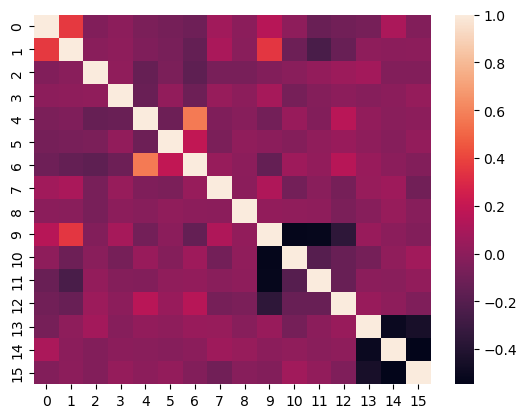

In [37]:
import seaborn as sns
sns.heatmap(train3.corr())
plt.show()

In [26]:
from sklearn.decomposition import PCA

In [49]:
pca=PCA(n_components=14)
pca.fit(train3)


PCA(n_components=14)

In [50]:
pca.explained_variance_ratio_.cumsum()

array([0.13964489, 0.24286956, 0.342153  , 0.43651061, 0.51540246,
       0.58861883, 0.65720995, 0.71895249, 0.77999773, 0.83820574,
       0.89187465, 0.94193197, 0.97840424, 1.        ])

In [60]:
train_pca=pca.transform(train3)

In [61]:
train_pca2=pd.DataFrame(train_pca,columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10","pca11","pca12","pca13","pca14"])

<AxesSubplot:>

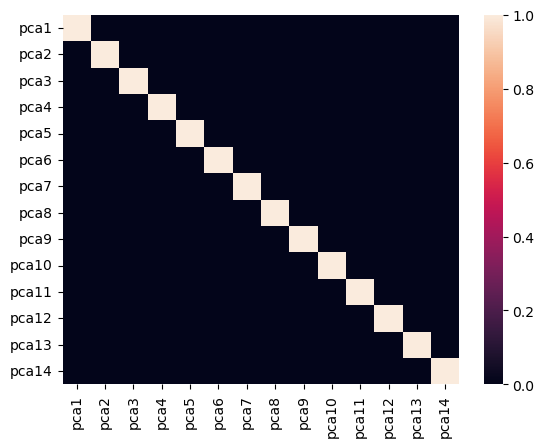

In [62]:
sns.heatmap(train_pca2.corr())

In [59]:
#anomally detection

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

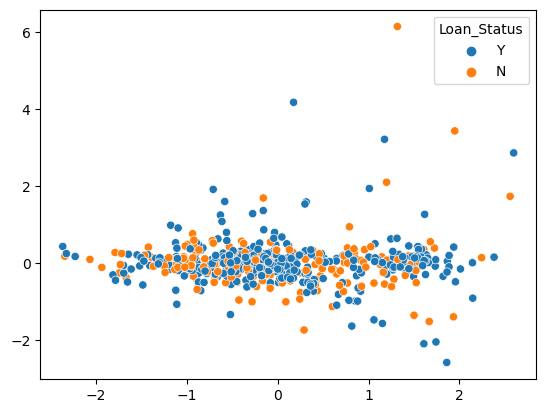

In [96]:
sns.scatterplot(train_pca[:,11],train_pca[:,13],hue=y)

In [97]:
from sklearn.covariance import EllipticEnvelope

In [108]:
e=EllipticEnvelope()
e.fit(train_pca2)
y_pred=e.predict(train_pca2)==-1

D:\python\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-15.468663711204648 > -84.259068384768383). You may want to try with a higher value of support_fraction (current value: 0.515).
  warnings.warn(
D:\python\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.866718042121889 > -84.021813560337222). You may want to try with a higher value of support_fraction (current value: 0.515).
  warnings.warn(
D:\python\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-84.998741477631597 > -87.703346207041932). You may want to try with a higher value of support_fraction (current value: 0.515).
  warnings.warn(
D:\python\lib\site-packages\sklearn\covariance\_robu

In [103]:
y=y.replace(["Y","N"],[0,1])

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       422
           1       0.44      0.14      0.21       192

    accuracy                           0.67       614
   macro avg       0.57      0.53      0.50       614
weighted avg       0.62      0.67      0.61       614



In [107]:
from sklearn.neighbors import LocalOutlierFactor

In [113]:
lof=LocalOutlierFactor()

y_pred=lof.fit_predict(train_pca2)==-1
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       422
           1       0.40      0.17      0.23       192

    accuracy                           0.66       614
   macro avg       0.55      0.53      0.51       614
weighted avg       0.60      0.66      0.61       614



In [117]:
from sklearn.ensemble import IsolationForest
isf=IsolationForest()
isf.fit(train_pca2)
y_pred=isf.predict(train_pca2)==-1
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       422
           1       0.46      0.09      0.15       192

    accuracy                           0.68       614
   macro avg       0.58      0.52      0.48       614
weighted avg       0.62      0.68      0.60       614



In [118]:
#anomally detection technique will not work o this because there is no clear seprator

In [126]:
from sklearn.model_selection import train_test_split
Xtr,Xte,Ytr,Yte=train_test_split(train_pca2,y,test_size=0.33,random_state=1)
from sklearn.model_selection import GridSearchCV,KFold

In [122]:
#logistics 
from sklearn.linear_model import LogisticRegression


In [130]:
log=LogisticRegression(class_weight="balanced")
para={"C":[0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,1,1.5,2]
}
fold=KFold(n_splits=5)

In [131]:
grid_log=GridSearchCV(log,param_grid=para,cv=fold,verbose=1)
grid_log.fit(Xtr,Ytr)
print(grid_log.best_estimator_)
y_pred=grid_log.predict(Xte)
print(classification_report(Yte,y_pred))
print(grid_log.score(Xte,Yte))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
LogisticRegression(C=0.1, class_weight='balanced')
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       132
           1       0.77      0.51      0.61        71

    accuracy                           0.77       203
   macro avg       0.77      0.71      0.73       203
weighted avg       0.77      0.77      0.76       203

0.7733990147783252


In [132]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(Xtr,Ytr)
model.score(Xte,Yte)

0.7389162561576355

In [140]:
model_rf=RandomForestClassifier(random_state=1,class_weight="balanced")
para={"max_depth":[5,10,15,20],
      "n_estimators":[25,50,75],
    "max_features":[3,5,7,9,10]
}
grid_rf=GridSearchCV(model_rf,param_grid=para,cv=fold,verbose=1)
grid_rf.fit(Xtr,Ytr)
print(grid_rf.best_estimator_)
y_pred=grid_rf.predict(Xte)
print(classification_report(Yte,y_pred))
print(grid_rf.score(Xte,Yte))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=5,
                       n_estimators=50, random_state=1)
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       132
           1       0.86      0.44      0.58        71

    accuracy                           0.78       203
   macro avg       0.81      0.70      0.71       203
weighted avg       0.80      0.78      0.76       203

0.7783251231527094


In [135]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbt=GradientBoostingClassifier(random_state=1)
para_gb={"n_estimators":[50,75,100],
        "max_depth":[2,3,4],
        "learning_rate":[0.1,0.075,0.05]}
grid_gbt=GridSearchCV(model_gbt,param_grid=para_gb,cv=fold,verbose=1)
grid_gbt.fit(Xtr,Ytr)
print(grid_gbt.best_estimator_)
y_pred=grid_gbt.predict(Xte)
print(classification_report(Yte,y_pred))
print(grid_gbt.score(Xte,Yte))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
GradientBoostingClassifier(learning_rate=0.075, max_depth=2, n_estimators=50,
                           random_state=1)
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       132
           1       0.79      0.38      0.51        71

    accuracy                           0.75       203
   macro avg       0.77      0.66      0.67       203
weighted avg       0.76      0.75      0.72       203

0.7487684729064039


In [136]:
import xgboost as xgb
xgc=xgb.XGBClassifier( objective='binary:logistic')
para_xgc={
         "n_estimators":[50,75,150],
         "eta":[0.1,0.05],
         "max_depth":[4,5]}
grid_xgc=GridSearchCV(xgc,param_grid=para_xgc,cv=fold)
grid_xgc.fit(Xtr,Ytr,eval_set=[(Xtr,Ytr),(Xte,Yte)],eval_metric=['logloss','error'])


[0]	validation_0-logloss:0.65100	validation_0-error:0.16302	validation_1-logloss:0.66591	validation_1-error:0.28571
[1]	validation_0-logloss:0.61393	validation_0-error:0.16058	validation_1-logloss:0.64257	validation_1-error:0.27586
[2]	validation_0-logloss:0.58345	validation_0-error:0.15815	validation_1-logloss:0.62357	validation_1-error:0.27094
[3]	validation_0-logloss:0.55857	validation_0-error:0.15572	validation_1-logloss:0.60719	validation_1-error:0.26108
[4]	validation_0-logloss:0.53677	validation_0-error:0.15572	validation_1-logloss:0.59582	validation_1-error:0.27094
[5]	validation_0-logloss:0.51797	validation_0-error:0.15815	validation_1-logloss:0.58624	validation_1-error:0.26108
[6]	validation_0-logloss:0.50016	validation_0-error:0.15572	validation_1-logloss:0.57762	validation_1-error:0.25616
[7]	validation_0-logloss:0.48042	validation_0-error:0.15085	validation_1-logloss:0.57443	validation_1-error:0.26601
[8]	validation_0-logloss:0.46563	validation_0-error:0.14842	validation_1

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-logloss:0.31903	validation_0-error:0.11192	validation_1-logloss:0.56126	validation_1-error:0.25123
[27]	validation_0-logloss:0.31538	validation_0-error:0.10949	validation_1-logloss:0.56316	validation_1-error:0.25123
[28]	validation_0-logloss:0.30915	validation_0-error:0.10706	validation_1-logloss:0.56377	validation_1-error:0.24631
[29]	validation_0-logloss:0.30577	validation_0-error:0.10462	validation_1-logloss:0.56694	validation_1-error:0.25123
[30]	validation_0-logloss:0.30271	validation_0-error:0.09976	validation_1-logloss:0.56723	validation_1-error:0.25123
[31]	validation_0-logloss:0.29893	validation_0-error:0.09976	validation_1-logloss:0.56853	validation_1-error:0.25616
[32]	validation_0-logloss:0.29426	validation_0-error:0.10706	validation_1-logloss:0.56959	validation_1-error:0.26108
[33]	validation_0-logloss:0.29112	validation_0-error:0.09976	validation_1-logloss:0.57347	validation_1-error:0.26601
[34]	validation_0-logloss:0.28654	validation_0-error:0.09246	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



[27]	validation_0-logloss:0.31903	validation_0-error:0.13139	validation_1-logloss:0.54902	validation_1-error:0.23645
[28]	validation_0-logloss:0.31134	validation_0-error:0.12165	validation_1-logloss:0.55095	validation_1-error:0.24138
[29]	validation_0-logloss:0.30454	validation_0-error:0.11679	validation_1-logloss:0.55135	validation_1-error:0.24138
[30]	validation_0-logloss:0.30103	validation_0-error:0.10706	validation_1-logloss:0.55267	validation_1-error:0.24138
[31]	validation_0-logloss:0.29641	validation_0-error:0.10706	validation_1-logloss:0.55300	validation_1-error:0.24631
[32]	validation_0-logloss:0.29390	validation_0-error:0.10462	validation_1-logloss:0.55496	validation_1-error:0.24631
[33]	validation_0-logloss:0.29076	validation_0-error:0.09732	validation_1-logloss:0.55771	validation_1-error:0.24631
[34]	validation_0-logloss:0.28552	validation_0-error:0.08516	validation_1-logloss:0.55964	validation_1-error:0.24631
[35]	validation_0-logloss:0.28379	validation_0-error:0.08516	va

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.30001	validation_0-error:0.12409	validation_1-logloss:0.54771	validation_1-error:0.25123
[35]	validation_0-logloss:0.29687	validation_0-error:0.11922	validation_1-logloss:0.54972	validation_1-error:0.25123
[36]	validation_0-logloss:0.29338	validation_0-error:0.11436	validation_1-logloss:0.55005	validation_1-error:0.25123
[37]	validation_0-logloss:0.28920	validation_0-error:0.11436	validation_1-logloss:0.55173	validation_1-error:0.25616
[38]	validation_0-logloss:0.28843	validation_0-error:0.11679	validation_1-logloss:0.55324	validation_1-error:0.25616
[39]	validation_0-logloss:0.28773	validation_0-error:0.11679	validation_1-logloss:0.55531	validation_1-error:0.25616
[40]	validation_0-logloss:0.28473	validation_0-error:0.11192	validation_1-logloss:0.55803	validation_1-error:0.25616
[41]	validation_0-logloss:0.28269	validation_0-error:0.11192	validation_1-logloss:0.56021	validation_1-error:0.25616
[42]	validation_0-logloss:0.27999	validation_0-error:0.10706	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.28781	validation_0-error:0.11192	validation_1-logloss:0.60774	validation_1-error:0.25616
[39]	validation_0-logloss:0.28453	validation_0-error:0.10706	validation_1-logloss:0.61211	validation_1-error:0.25616
[40]	validation_0-logloss:0.28170	validation_0-error:0.10219	validation_1-logloss:0.61262	validation_1-error:0.26108
[41]	validation_0-logloss:0.28019	validation_0-error:0.09732	validation_1-logloss:0.61513	validation_1-error:0.26108
[42]	validation_0-logloss:0.27870	validation_0-error:0.09489	validation_1-logloss:0.61585	validation_1-error:0.26108
[43]	validation_0-logloss:0.27607	validation_0-error:0.09732	validation_1-logloss:0.61820	validation_1-error:0.25616
[44]	validation_0-logloss:0.27349	validation_0-error:0.09246	validation_1-logloss:0.62112	validation_1-error:0.25616
[45]	validation_0-logloss:0.27181	validation_0-error:0.09002	validation_1-logloss:0.62199	validation_1-error:0.25616
[46]	validation_0-logloss:0.26962	validation_0-error:0.08759	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.30761	validation_0-error:0.13139	validation_1-logloss:0.55864	validation_1-error:0.25123
[34]	validation_0-logloss:0.30546	validation_0-error:0.12409	validation_1-logloss:0.56106	validation_1-error:0.25616
[35]	validation_0-logloss:0.29955	validation_0-error:0.11679	validation_1-logloss:0.56216	validation_1-error:0.25123
[36]	validation_0-logloss:0.29525	validation_0-error:0.11679	validation_1-logloss:0.56316	validation_1-error:0.25123
[37]	validation_0-logloss:0.29349	validation_0-error:0.11436	validation_1-logloss:0.56561	validation_1-error:0.25616
[38]	validation_0-logloss:0.29037	validation_0-error:0.10949	validation_1-logloss:0.56924	validation_1-error:0.25616
[39]	validation_0-logloss:0.28812	validation_0-error:0.10949	validation_1-logloss:0.57075	validation_1-error:0.25616
[40]	validation_0-logloss:0.28580	validation_0-error:0.10949	validation_1-logloss:0.57032	validation_1-error:0.26601
[41]	validation_0-logloss:0.28368	validation_0-error:0.10706	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



[37]	validation_0-logloss:0.27843	validation_0-error:0.09002	validation_1-logloss:0.58209	validation_1-error:0.26601
[38]	validation_0-logloss:0.27535	validation_0-error:0.09002	validation_1-logloss:0.58610	validation_1-error:0.26601
[39]	validation_0-logloss:0.27155	validation_0-error:0.08759	validation_1-logloss:0.58815	validation_1-error:0.26108
[40]	validation_0-logloss:0.26965	validation_0-error:0.08759	validation_1-logloss:0.58964	validation_1-error:0.26108
[41]	validation_0-logloss:0.26397	validation_0-error:0.08029	validation_1-logloss:0.59263	validation_1-error:0.26601
[42]	validation_0-logloss:0.26205	validation_0-error:0.08029	validation_1-logloss:0.59500	validation_1-error:0.26108
[43]	validation_0-logloss:0.25839	validation_0-error:0.07786	validation_1-logloss:0.59802	validation_1-error:0.26601
[44]	validation_0-logloss:0.25650	validation_0-error:0.07543	validation_1-logloss:0.60141	validation_1-error:0.27094
[45]	validation_0-logloss:0.25355	validation_0-error:0.08273	va

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.26913	validation_0-error:0.08029	validation_1-logloss:0.57048	validation_1-error:0.24631
[41]	validation_0-logloss:0.26638	validation_0-error:0.08029	validation_1-logloss:0.57254	validation_1-error:0.25616
[42]	validation_0-logloss:0.26445	validation_0-error:0.07786	validation_1-logloss:0.57359	validation_1-error:0.25123
[43]	validation_0-logloss:0.26150	validation_0-error:0.07543	validation_1-logloss:0.57552	validation_1-error:0.25123
[44]	validation_0-logloss:0.25957	validation_0-error:0.07299	validation_1-logloss:0.57657	validation_1-error:0.25616
[45]	validation_0-logloss:0.25789	validation_0-error:0.07056	validation_1-logloss:0.57702	validation_1-error:0.25616
[46]	validation_0-logloss:0.25597	validation_0-error:0.07299	validation_1-logloss:0.57736	validation_1-error:0.25616
[47]	validation_0-logloss:0.25429	validation_0-error:0.07056	validation_1-logloss:0.57850	validation_1-error:0.25616
[48]	validation_0-logloss:0.25290	validation_0-error:0.06326	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.30072	validation_0-error:0.12409	validation_1-logloss:0.54641	validation_1-error:0.25616
[34]	validation_0-logloss:0.30001	validation_0-error:0.12409	validation_1-logloss:0.54771	validation_1-error:0.25123
[35]	validation_0-logloss:0.29687	validation_0-error:0.11922	validation_1-logloss:0.54972	validation_1-error:0.25123
[36]	validation_0-logloss:0.29338	validation_0-error:0.11436	validation_1-logloss:0.55005	validation_1-error:0.25123
[37]	validation_0-logloss:0.28920	validation_0-error:0.11436	validation_1-logloss:0.55173	validation_1-error:0.25616
[38]	validation_0-logloss:0.28843	validation_0-error:0.11679	validation_1-logloss:0.55324	validation_1-error:0.25616
[39]	validation_0-logloss:0.28773	validation_0-error:0.11679	validation_1-logloss:0.55531	validation_1-error:0.25616
[40]	validation_0-logloss:0.28473	validation_0-error:0.11192	validation_1-logloss:0.55803	validation_1-error:0.25616
[41]	validation_0-logloss:0.28269	validation_0-error:0.11192	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.31534	validation_0-error:0.13139	validation_1-logloss:0.59101	validation_1-error:0.23645
[30]	validation_0-logloss:0.31142	validation_0-error:0.12409	validation_1-logloss:0.59201	validation_1-error:0.24138
[31]	validation_0-logloss:0.30800	validation_0-error:0.12409	validation_1-logloss:0.59237	validation_1-error:0.24138
[32]	validation_0-logloss:0.30284	validation_0-error:0.12165	validation_1-logloss:0.59413	validation_1-error:0.23645
[33]	validation_0-logloss:0.30033	validation_0-error:0.12165	validation_1-logloss:0.59545	validation_1-error:0.23645
[34]	validation_0-logloss:0.29682	validation_0-error:0.11922	validation_1-logloss:0.59857	validation_1-error:0.24138
[35]	validation_0-logloss:0.29357	validation_0-error:0.11679	validation_1-logloss:0.59961	validation_1-error:0.24631
[36]	validation_0-logloss:0.29174	validation_0-error:0.11922	validation_1-logloss:0.60177	validation_1-error:0.25123
[37]	validation_0-logloss:0.29015	validation_0-error:0.11679	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.32383	validation_0-error:0.12895	validation_1-logloss:0.55336	validation_1-error:0.25123
[29]	validation_0-logloss:0.31959	validation_0-error:0.12652	validation_1-logloss:0.55423	validation_1-error:0.25123
[30]	validation_0-logloss:0.31683	validation_0-error:0.12652	validation_1-logloss:0.55477	validation_1-error:0.25123
[31]	validation_0-logloss:0.31329	validation_0-error:0.12652	validation_1-logloss:0.55532	validation_1-error:0.25616
[32]	validation_0-logloss:0.31091	validation_0-error:0.12409	validation_1-logloss:0.55649	validation_1-error:0.25123
[33]	validation_0-logloss:0.30761	validation_0-error:0.13139	validation_1-logloss:0.55864	validation_1-error:0.25123
[34]	validation_0-logloss:0.30546	validation_0-error:0.12409	validation_1-logloss:0.56106	validation_1-error:0.25616
[35]	validation_0-logloss:0.29955	validation_0-error:0.11679	validation_1-logloss:0.56216	validation_1-error:0.25123
[36]	validation_0-logloss:0.29525	validation_0-error:0.11679	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.30271	validation_0-error:0.09976	validation_1-logloss:0.56723	validation_1-error:0.25123
[31]	validation_0-logloss:0.29893	validation_0-error:0.09976	validation_1-logloss:0.56853	validation_1-error:0.25616
[32]	validation_0-logloss:0.29426	validation_0-error:0.10706	validation_1-logloss:0.56959	validation_1-error:0.26108
[33]	validation_0-logloss:0.29112	validation_0-error:0.09976	validation_1-logloss:0.57347	validation_1-error:0.26601
[34]	validation_0-logloss:0.28654	validation_0-error:0.09246	validation_1-logloss:0.57520	validation_1-error:0.26601
[35]	validation_0-logloss:0.28402	validation_0-error:0.09246	validation_1-logloss:0.57713	validation_1-error:0.26601
[36]	validation_0-logloss:0.28226	validation_0-error:0.09246	validation_1-logloss:0.57837	validation_1-error:0.26601
[37]	validation_0-logloss:0.27843	validation_0-error:0.09002	validation_1-logloss:0.58209	validation_1-error:0.26601
[38]	validation_0-logloss:0.27535	validation_0-error:0.09002	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.29641	validation_0-error:0.10706	validation_1-logloss:0.55300	validation_1-error:0.24631
[32]	validation_0-logloss:0.29390	validation_0-error:0.10462	validation_1-logloss:0.55496	validation_1-error:0.24631
[33]	validation_0-logloss:0.29076	validation_0-error:0.09732	validation_1-logloss:0.55771	validation_1-error:0.24631
[34]	validation_0-logloss:0.28552	validation_0-error:0.08516	validation_1-logloss:0.55964	validation_1-error:0.24631
[35]	validation_0-logloss:0.28379	validation_0-error:0.08516	validation_1-logloss:0.56301	validation_1-error:0.24138
[36]	validation_0-logloss:0.28199	validation_0-error:0.08516	validation_1-logloss:0.56487	validation_1-error:0.24138
[37]	validation_0-logloss:0.27914	validation_0-error:0.08516	validation_1-logloss:0.56761	validation_1-error:0.24138
[38]	validation_0-logloss:0.27564	validation_0-error:0.08273	validation_1-logloss:0.56852	validation_1-error:0.24138
[39]	validation_0-logloss:0.27381	validation_0-error:0.08516	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.28920	validation_0-error:0.11436	validation_1-logloss:0.55173	validation_1-error:0.25616
[38]	validation_0-logloss:0.28843	validation_0-error:0.11679	validation_1-logloss:0.55324	validation_1-error:0.25616
[39]	validation_0-logloss:0.28773	validation_0-error:0.11679	validation_1-logloss:0.55531	validation_1-error:0.25616
[40]	validation_0-logloss:0.28473	validation_0-error:0.11192	validation_1-logloss:0.55803	validation_1-error:0.25616
[41]	validation_0-logloss:0.28269	validation_0-error:0.11192	validation_1-logloss:0.56021	validation_1-error:0.25616
[42]	validation_0-logloss:0.27999	validation_0-error:0.10706	validation_1-logloss:0.55953	validation_1-error:0.25616
[43]	validation_0-logloss:0.27725	validation_0-error:0.10462	validation_1-logloss:0.55901	validation_1-error:0.25616
[44]	validation_0-logloss:0.27454	validation_0-error:0.10706	validation_1-logloss:0.55784	validation_1-error:0.25616
[45]	validation_0-logloss:0.27357	validation_0-error:0.10219	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.31142	validation_0-error:0.12409	validation_1-logloss:0.59201	validation_1-error:0.24138
[31]	validation_0-logloss:0.30800	validation_0-error:0.12409	validation_1-logloss:0.59237	validation_1-error:0.24138
[32]	validation_0-logloss:0.30284	validation_0-error:0.12165	validation_1-logloss:0.59413	validation_1-error:0.23645
[33]	validation_0-logloss:0.30033	validation_0-error:0.12165	validation_1-logloss:0.59545	validation_1-error:0.23645
[34]	validation_0-logloss:0.29682	validation_0-error:0.11922	validation_1-logloss:0.59857	validation_1-error:0.24138
[35]	validation_0-logloss:0.29357	validation_0-error:0.11679	validation_1-logloss:0.59961	validation_1-error:0.24631
[36]	validation_0-logloss:0.29174	validation_0-error:0.11922	validation_1-logloss:0.60177	validation_1-error:0.25123
[37]	validation_0-logloss:0.29015	validation_0-error:0.11679	validation_1-logloss:0.60600	validation_1-error:0.26108
[38]	validation_0-logloss:0.28781	validation_0-error:0.11192	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.29525	validation_0-error:0.11679	validation_1-logloss:0.56316	validation_1-error:0.25123
[37]	validation_0-logloss:0.29349	validation_0-error:0.11436	validation_1-logloss:0.56561	validation_1-error:0.25616
[38]	validation_0-logloss:0.29037	validation_0-error:0.10949	validation_1-logloss:0.56924	validation_1-error:0.25616
[39]	validation_0-logloss:0.28812	validation_0-error:0.10949	validation_1-logloss:0.57075	validation_1-error:0.25616
[40]	validation_0-logloss:0.28580	validation_0-error:0.10949	validation_1-logloss:0.57032	validation_1-error:0.26601
[41]	validation_0-logloss:0.28368	validation_0-error:0.10706	validation_1-logloss:0.57054	validation_1-error:0.26601
[42]	validation_0-logloss:0.28248	validation_0-error:0.10462	validation_1-logloss:0.57244	validation_1-error:0.26601
[43]	validation_0-logloss:0.27943	validation_0-error:0.09976	validation_1-logloss:0.57408	validation_1-error:0.26601
[44]	validation_0-logloss:0.27730	validation_0-error:0.09732	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.28178	validation_0-error:0.08759	validation_1-logloss:0.58027	validation_1-error:0.26601
[31]	validation_0-logloss:0.27848	validation_0-error:0.08759	validation_1-logloss:0.58399	validation_1-error:0.26108
[32]	validation_0-logloss:0.27517	validation_0-error:0.08759	validation_1-logloss:0.58699	validation_1-error:0.26601
[33]	validation_0-logloss:0.26859	validation_0-error:0.08516	validation_1-logloss:0.58943	validation_1-error:0.26601
[34]	validation_0-logloss:0.26557	validation_0-error:0.08516	validation_1-logloss:0.58963	validation_1-error:0.26108
[35]	validation_0-logloss:0.26213	validation_0-error:0.08029	validation_1-logloss:0.59330	validation_1-error:0.26601
[36]	validation_0-logloss:0.25968	validation_0-error:0.08029	validation_1-logloss:0.59355	validation_1-error:0.26108
[37]	validation_0-logloss:0.25642	validation_0-error:0.08029	validation_1-logloss:0.59509	validation_1-error:0.26601
[38]	validation_0-logloss:0.25247	validation_0-error:0.07543	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.29207	validation_0-error:0.09002	validation_1-logloss:0.55766	validation_1-error:0.26601
[25]	validation_0-logloss:0.28819	validation_0-error:0.08516	validation_1-logloss:0.55955	validation_1-error:0.27094
[26]	validation_0-logloss:0.28388	validation_0-error:0.08029	validation_1-logloss:0.56146	validation_1-error:0.26601
[27]	validation_0-logloss:0.27601	validation_0-error:0.07786	validation_1-logloss:0.56453	validation_1-error:0.27094
[28]	validation_0-logloss:0.27267	validation_0-error:0.07786	validation_1-logloss:0.56558	validation_1-error:0.27094
[29]	validation_0-logloss:0.26889	validation_0-error:0.07056	validation_1-logloss:0.56866	validation_1-error:0.27094
[30]	validation_0-logloss:0.26552	validation_0-error:0.07299	validation_1-logloss:0.56986	validation_1-error:0.27094
[31]	validation_0-logloss:0.26124	validation_0-error:0.06813	validation_1-logloss:0.56975	validation_1-error:0.26601
[32]	validation_0-logloss:0.25888	validation_0-error:0.07056	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.30236	validation_0-error:0.10949	validation_1-logloss:0.55486	validation_1-error:0.24138
[29]	validation_0-logloss:0.29892	validation_0-error:0.10706	validation_1-logloss:0.55772	validation_1-error:0.24138
[30]	validation_0-logloss:0.29499	validation_0-error:0.10949	validation_1-logloss:0.55438	validation_1-error:0.24138
[31]	validation_0-logloss:0.29092	validation_0-error:0.10462	validation_1-logloss:0.55699	validation_1-error:0.24138
[32]	validation_0-logloss:0.28600	validation_0-error:0.10219	validation_1-logloss:0.56151	validation_1-error:0.24631
[33]	validation_0-logloss:0.28376	validation_0-error:0.10219	validation_1-logloss:0.56324	validation_1-error:0.24138
[34]	validation_0-logloss:0.28219	validation_0-error:0.10219	validation_1-logloss:0.56375	validation_1-error:0.24138
[35]	validation_0-logloss:0.27936	validation_0-error:0.09732	validation_1-logloss:0.56764	validation_1-error:0.24138
[36]	validation_0-logloss:0.27850	validation_0-error:0.09732	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.29556	validation_0-error:0.10706	validation_1-logloss:0.58456	validation_1-error:0.25123
[29]	validation_0-logloss:0.29139	validation_0-error:0.09976	validation_1-logloss:0.58950	validation_1-error:0.25123
[30]	validation_0-logloss:0.28774	validation_0-error:0.09976	validation_1-logloss:0.59446	validation_1-error:0.25616
[31]	validation_0-logloss:0.28469	validation_0-error:0.09732	validation_1-logloss:0.59950	validation_1-error:0.25616
[32]	validation_0-logloss:0.28127	validation_0-error:0.09246	validation_1-logloss:0.60454	validation_1-error:0.25616
[33]	validation_0-logloss:0.27940	validation_0-error:0.09246	validation_1-logloss:0.60716	validation_1-error:0.25616
[34]	validation_0-logloss:0.27596	validation_0-error:0.09246	validation_1-logloss:0.60934	validation_1-error:0.25616
[35]	validation_0-logloss:0.27304	validation_0-error:0.09246	validation_1-logloss:0.61229	validation_1-error:0.25616
[36]	validation_0-logloss:0.27167	validation_0-error:0.08759	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-logloss:0.30632	validation_0-error:0.11436	validation_1-logloss:0.55791	validation_1-error:0.25616
[27]	validation_0-logloss:0.30029	validation_0-error:0.10949	validation_1-logloss:0.56087	validation_1-error:0.26108
[28]	validation_0-logloss:0.29541	validation_0-error:0.10949	validation_1-logloss:0.56475	validation_1-error:0.26108
[29]	validation_0-logloss:0.29315	validation_0-error:0.10949	validation_1-logloss:0.56751	validation_1-error:0.26601
[30]	validation_0-logloss:0.28839	validation_0-error:0.10219	validation_1-logloss:0.57010	validation_1-error:0.26601
[31]	validation_0-logloss:0.28638	validation_0-error:0.09489	validation_1-logloss:0.57218	validation_1-error:0.26601
[32]	validation_0-logloss:0.28253	validation_0-error:0.09246	validation_1-logloss:0.57644	validation_1-error:0.26601
[33]	validation_0-logloss:0.28105	validation_0-error:0.09246	validation_1-logloss:0.57934	validation_1-error:0.26601
[34]	validation_0-logloss:0.27706	validation_0-error:0.09489	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.29513	validation_0-error:0.09976	validation_1-logloss:0.57041	validation_1-error:0.26601
[28]	validation_0-logloss:0.29086	validation_0-error:0.09732	validation_1-logloss:0.57151	validation_1-error:0.26601
[29]	validation_0-logloss:0.28593	validation_0-error:0.09489	validation_1-logloss:0.57394	validation_1-error:0.26601
[30]	validation_0-logloss:0.28178	validation_0-error:0.08759	validation_1-logloss:0.58027	validation_1-error:0.26601
[31]	validation_0-logloss:0.27848	validation_0-error:0.08759	validation_1-logloss:0.58399	validation_1-error:0.26108
[32]	validation_0-logloss:0.27517	validation_0-error:0.08759	validation_1-logloss:0.58699	validation_1-error:0.26601
[33]	validation_0-logloss:0.26859	validation_0-error:0.08516	validation_1-logloss:0.58943	validation_1-error:0.26601
[34]	validation_0-logloss:0.26557	validation_0-error:0.08516	validation_1-logloss:0.58963	validation_1-error:0.26108
[35]	validation_0-logloss:0.26213	validation_0-error:0.08029	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.27601	validation_0-error:0.07786	validation_1-logloss:0.56453	validation_1-error:0.27094
[28]	validation_0-logloss:0.27267	validation_0-error:0.07786	validation_1-logloss:0.56558	validation_1-error:0.27094
[29]	validation_0-logloss:0.26889	validation_0-error:0.07056	validation_1-logloss:0.56866	validation_1-error:0.27094
[30]	validation_0-logloss:0.26552	validation_0-error:0.07299	validation_1-logloss:0.56986	validation_1-error:0.27094
[31]	validation_0-logloss:0.26124	validation_0-error:0.06813	validation_1-logloss:0.56975	validation_1-error:0.26601
[32]	validation_0-logloss:0.25888	validation_0-error:0.07056	validation_1-logloss:0.57090	validation_1-error:0.26601
[33]	validation_0-logloss:0.25461	validation_0-error:0.05839	validation_1-logloss:0.57289	validation_1-error:0.26601
[34]	validation_0-logloss:0.24877	validation_0-error:0.05839	validation_1-logloss:0.57340	validation_1-error:0.25616
[35]	validation_0-logloss:0.24482	validation_0-error:0.05839	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.29892	validation_0-error:0.10706	validation_1-logloss:0.55772	validation_1-error:0.24138
[30]	validation_0-logloss:0.29499	validation_0-error:0.10949	validation_1-logloss:0.55438	validation_1-error:0.24138
[31]	validation_0-logloss:0.29092	validation_0-error:0.10462	validation_1-logloss:0.55699	validation_1-error:0.24138
[32]	validation_0-logloss:0.28600	validation_0-error:0.10219	validation_1-logloss:0.56151	validation_1-error:0.24631
[33]	validation_0-logloss:0.28376	validation_0-error:0.10219	validation_1-logloss:0.56324	validation_1-error:0.24138
[34]	validation_0-logloss:0.28219	validation_0-error:0.10219	validation_1-logloss:0.56375	validation_1-error:0.24138
[35]	validation_0-logloss:0.27936	validation_0-error:0.09732	validation_1-logloss:0.56764	validation_1-error:0.24138
[36]	validation_0-logloss:0.27850	validation_0-error:0.09732	validation_1-logloss:0.57026	validation_1-error:0.24138
[37]	validation_0-logloss:0.27709	validation_0-error:0.09489	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.28774	validation_0-error:0.09976	validation_1-logloss:0.59446	validation_1-error:0.25616
[31]	validation_0-logloss:0.28469	validation_0-error:0.09732	validation_1-logloss:0.59950	validation_1-error:0.25616
[32]	validation_0-logloss:0.28127	validation_0-error:0.09246	validation_1-logloss:0.60454	validation_1-error:0.25616
[33]	validation_0-logloss:0.27940	validation_0-error:0.09246	validation_1-logloss:0.60716	validation_1-error:0.25616
[34]	validation_0-logloss:0.27596	validation_0-error:0.09246	validation_1-logloss:0.60934	validation_1-error:0.25616
[35]	validation_0-logloss:0.27304	validation_0-error:0.09246	validation_1-logloss:0.61229	validation_1-error:0.25616
[36]	validation_0-logloss:0.27167	validation_0-error:0.08759	validation_1-logloss:0.61334	validation_1-error:0.25616
[37]	validation_0-logloss:0.26842	validation_0-error:0.09002	validation_1-logloss:0.61763	validation_1-error:0.25616
[38]	validation_0-logloss:0.26606	validation_0-error:0.08759	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.30029	validation_0-error:0.10949	validation_1-logloss:0.56087	validation_1-error:0.26108
[28]	validation_0-logloss:0.29541	validation_0-error:0.10949	validation_1-logloss:0.56475	validation_1-error:0.26108
[29]	validation_0-logloss:0.29315	validation_0-error:0.10949	validation_1-logloss:0.56751	validation_1-error:0.26601
[30]	validation_0-logloss:0.28839	validation_0-error:0.10219	validation_1-logloss:0.57010	validation_1-error:0.26601
[31]	validation_0-logloss:0.28638	validation_0-error:0.09489	validation_1-logloss:0.57218	validation_1-error:0.26601
[32]	validation_0-logloss:0.28253	validation_0-error:0.09246	validation_1-logloss:0.57644	validation_1-error:0.26601
[33]	validation_0-logloss:0.28105	validation_0-error:0.09246	validation_1-logloss:0.57934	validation_1-error:0.26601
[34]	validation_0-logloss:0.27706	validation_0-error:0.09489	validation_1-logloss:0.58153	validation_1-error:0.26601
[35]	validation_0-logloss:0.27452	validation_0-error:0.09246	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.26859	validation_0-error:0.08516	validation_1-logloss:0.58943	validation_1-error:0.26601
[34]	validation_0-logloss:0.26557	validation_0-error:0.08516	validation_1-logloss:0.58963	validation_1-error:0.26108
[35]	validation_0-logloss:0.26213	validation_0-error:0.08029	validation_1-logloss:0.59330	validation_1-error:0.26601
[36]	validation_0-logloss:0.25968	validation_0-error:0.08029	validation_1-logloss:0.59355	validation_1-error:0.26108
[37]	validation_0-logloss:0.25642	validation_0-error:0.08029	validation_1-logloss:0.59509	validation_1-error:0.26601
[38]	validation_0-logloss:0.25247	validation_0-error:0.07543	validation_1-logloss:0.59696	validation_1-error:0.26601
[39]	validation_0-logloss:0.24979	validation_0-error:0.06813	validation_1-logloss:0.60054	validation_1-error:0.27094
[40]	validation_0-logloss:0.24605	validation_0-error:0.06813	validation_1-logloss:0.60361	validation_1-error:0.27586
[41]	validation_0-logloss:0.24458	validation_0-error:0.06569	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-logloss:0.26889	validation_0-error:0.07056	validation_1-logloss:0.56866	validation_1-error:0.27094
[30]	validation_0-logloss:0.26552	validation_0-error:0.07299	validation_1-logloss:0.56986	validation_1-error:0.27094
[31]	validation_0-logloss:0.26124	validation_0-error:0.06813	validation_1-logloss:0.56975	validation_1-error:0.26601
[32]	validation_0-logloss:0.25888	validation_0-error:0.07056	validation_1-logloss:0.57090	validation_1-error:0.26601
[33]	validation_0-logloss:0.25461	validation_0-error:0.05839	validation_1-logloss:0.57289	validation_1-error:0.26601
[34]	validation_0-logloss:0.24877	validation_0-error:0.05839	validation_1-logloss:0.57340	validation_1-error:0.25616
[35]	validation_0-logloss:0.24482	validation_0-error:0.05839	validation_1-logloss:0.57607	validation_1-error:0.26108
[36]	validation_0-logloss:0.23932	validation_0-error:0.05839	validation_1-logloss:0.57968	validation_1-error:0.27586
[37]	validation_0-logloss:0.23776	validation_0-error:0.05596	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-logloss:0.28600	validation_0-error:0.10219	validation_1-logloss:0.56151	validation_1-error:0.24631
[33]	validation_0-logloss:0.28376	validation_0-error:0.10219	validation_1-logloss:0.56324	validation_1-error:0.24138
[34]	validation_0-logloss:0.28219	validation_0-error:0.10219	validation_1-logloss:0.56375	validation_1-error:0.24138
[35]	validation_0-logloss:0.27936	validation_0-error:0.09732	validation_1-logloss:0.56764	validation_1-error:0.24138
[36]	validation_0-logloss:0.27850	validation_0-error:0.09732	validation_1-logloss:0.57026	validation_1-error:0.24138
[37]	validation_0-logloss:0.27709	validation_0-error:0.09489	validation_1-logloss:0.57244	validation_1-error:0.24138
[38]	validation_0-logloss:0.27309	validation_0-error:0.09489	validation_1-logloss:0.57613	validation_1-error:0.24138
[39]	validation_0-logloss:0.27132	validation_0-error:0.09489	validation_1-logloss:0.57670	validation_1-error:0.24138
[40]	validation_0-logloss:0.27011	validation_0-error:0.09489	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.27304	validation_0-error:0.09246	validation_1-logloss:0.61229	validation_1-error:0.25616
[36]	validation_0-logloss:0.27167	validation_0-error:0.08759	validation_1-logloss:0.61334	validation_1-error:0.25616
[37]	validation_0-logloss:0.26842	validation_0-error:0.09002	validation_1-logloss:0.61763	validation_1-error:0.25616
[38]	validation_0-logloss:0.26606	validation_0-error:0.08759	validation_1-logloss:0.62230	validation_1-error:0.25616
[39]	validation_0-logloss:0.26281	validation_0-error:0.08516	validation_1-logloss:0.62167	validation_1-error:0.25616
[40]	validation_0-logloss:0.26067	validation_0-error:0.08516	validation_1-logloss:0.62423	validation_1-error:0.25616
[41]	validation_0-logloss:0.25832	validation_0-error:0.08273	validation_1-logloss:0.62544	validation_1-error:0.25616
[42]	validation_0-logloss:0.25570	validation_0-error:0.08516	validation_1-logloss:0.63195	validation_1-error:0.25123
[43]	validation_0-logloss:0.25332	validation_0-error:0.08273	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.27452	validation_0-error:0.09246	validation_1-logloss:0.58225	validation_1-error:0.26601
[36]	validation_0-logloss:0.27305	validation_0-error:0.09246	validation_1-logloss:0.58488	validation_1-error:0.26601
[37]	validation_0-logloss:0.27034	validation_0-error:0.09002	validation_1-logloss:0.58856	validation_1-error:0.26601
[38]	validation_0-logloss:0.26582	validation_0-error:0.08759	validation_1-logloss:0.59123	validation_1-error:0.26601
[39]	validation_0-logloss:0.26208	validation_0-error:0.08759	validation_1-logloss:0.59207	validation_1-error:0.27094
[40]	validation_0-logloss:0.25900	validation_0-error:0.08516	validation_1-logloss:0.59308	validation_1-error:0.26601
[41]	validation_0-logloss:0.25677	validation_0-error:0.08759	validation_1-logloss:0.59353	validation_1-error:0.26601
[42]	validation_0-logloss:0.25455	validation_0-error:0.08516	validation_1-logloss:0.59612	validation_1-error:0.27094
[43]	validation_0-logloss:0.25157	validation_0-error:0.08273	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.36591	validation_0-error:0.13869	validation_1-logloss:0.55525	validation_1-error:0.26108
[40]	validation_0-logloss:0.36209	validation_0-error:0.13625	validation_1-logloss:0.55494	validation_1-error:0.25616
[41]	validation_0-logloss:0.35871	validation_0-error:0.13139	validation_1-logloss:0.55590	validation_1-error:0.25616
[42]	validation_0-logloss:0.35492	validation_0-error:0.13382	validation_1-logloss:0.55584	validation_1-error:0.25616
[43]	validation_0-logloss:0.35199	validation_0-error:0.13139	validation_1-logloss:0.55681	validation_1-error:0.25616
[44]	validation_0-logloss:0.34782	validation_0-error:0.12652	validation_1-logloss:0.55735	validation_1-error:0.25616
[45]	validation_0-logloss:0.34449	validation_0-error:0.12409	validation_1-logloss:0.55778	validation_1-error:0.25616
[46]	validation_0-logloss:0.34155	validation_0-error:0.12409	validation_1-logloss:0.55832	validation_1-error:0.25616
[47]	validation_0-logloss:0.33890	validation_0-error:0.12165	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.36119	validation_0-error:0.13625	validation_1-logloss:0.54967	validation_1-error:0.24631
[41]	validation_0-logloss:0.35771	validation_0-error:0.13625	validation_1-logloss:0.54921	validation_1-error:0.24631
[42]	validation_0-logloss:0.35512	validation_0-error:0.13625	validation_1-logloss:0.54962	validation_1-error:0.25123
[43]	validation_0-logloss:0.35209	validation_0-error:0.13625	validation_1-logloss:0.54831	validation_1-error:0.25123
[44]	validation_0-logloss:0.34789	validation_0-error:0.12409	validation_1-logloss:0.54855	validation_1-error:0.24631
[45]	validation_0-logloss:0.34504	validation_0-error:0.12652	validation_1-logloss:0.55056	validation_1-error:0.25123
[46]	validation_0-logloss:0.34272	validation_0-error:0.12895	validation_1-logloss:0.55120	validation_1-error:0.25123
[47]	validation_0-logloss:0.33923	validation_0-error:0.12652	validation_1-logloss:0.55229	validation_1-error:0.24631
[48]	validation_0-logloss:0.33672	validation_0-error:0.12652	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.36668	validation_0-error:0.14842	validation_1-logloss:0.53465	validation_1-error:0.25123
[41]	validation_0-logloss:0.36494	validation_0-error:0.14842	validation_1-logloss:0.53577	validation_1-error:0.25123
[42]	validation_0-logloss:0.36272	validation_0-error:0.14355	validation_1-logloss:0.53566	validation_1-error:0.24631
[43]	validation_0-logloss:0.36113	validation_0-error:0.14112	validation_1-logloss:0.53628	validation_1-error:0.24631
[44]	validation_0-logloss:0.35818	validation_0-error:0.14112	validation_1-logloss:0.53582	validation_1-error:0.25123
[45]	validation_0-logloss:0.35684	validation_0-error:0.14112	validation_1-logloss:0.53588	validation_1-error:0.25123
[46]	validation_0-logloss:0.35438	validation_0-error:0.14112	validation_1-logloss:0.53557	validation_1-error:0.25123
[47]	validation_0-logloss:0.35282	validation_0-error:0.14112	validation_1-logloss:0.53663	validation_1-error:0.25123
[48]	validation_0-logloss:0.35002	validation_0-error:0.14112	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.37760	validation_0-error:0.15815	validation_1-logloss:0.56439	validation_1-error:0.24631
[39]	validation_0-logloss:0.37457	validation_0-error:0.15572	validation_1-logloss:0.56539	validation_1-error:0.24631
[40]	validation_0-logloss:0.37002	validation_0-error:0.15572	validation_1-logloss:0.56689	validation_1-error:0.24631
[41]	validation_0-logloss:0.36757	validation_0-error:0.15572	validation_1-logloss:0.56730	validation_1-error:0.24631
[42]	validation_0-logloss:0.36423	validation_0-error:0.15328	validation_1-logloss:0.56856	validation_1-error:0.24631
[43]	validation_0-logloss:0.36002	validation_0-error:0.15085	validation_1-logloss:0.56884	validation_1-error:0.24138
[44]	validation_0-logloss:0.35720	validation_0-error:0.15085	validation_1-logloss:0.57004	validation_1-error:0.24138
[45]	validation_0-logloss:0.35441	validation_0-error:0.15085	validation_1-logloss:0.57084	validation_1-error:0.24138
[46]	validation_0-logloss:0.35248	validation_0-error:0.14599	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.38228	validation_0-error:0.14355	validation_1-logloss:0.53902	validation_1-error:0.25123
[36]	validation_0-logloss:0.37968	validation_0-error:0.14355	validation_1-logloss:0.54022	validation_1-error:0.25616
[37]	validation_0-logloss:0.37579	validation_0-error:0.14355	validation_1-logloss:0.54119	validation_1-error:0.25123
[38]	validation_0-logloss:0.37225	validation_0-error:0.14112	validation_1-logloss:0.53994	validation_1-error:0.25616
[39]	validation_0-logloss:0.36833	validation_0-error:0.13625	validation_1-logloss:0.54136	validation_1-error:0.25616
[40]	validation_0-logloss:0.36541	validation_0-error:0.13625	validation_1-logloss:0.54169	validation_1-error:0.25123
[41]	validation_0-logloss:0.36180	validation_0-error:0.13382	validation_1-logloss:0.54256	validation_1-error:0.25616
[42]	validation_0-logloss:0.35991	validation_0-error:0.13382	validation_1-logloss:0.54372	validation_1-error:0.25616
[43]	validation_0-logloss:0.35685	validation_0-error:0.13625	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.37212	validation_0-error:0.14112	validation_1-logloss:0.55424	validation_1-error:0.26601
[38]	validation_0-logloss:0.37049	validation_0-error:0.14112	validation_1-logloss:0.55486	validation_1-error:0.26601
[39]	validation_0-logloss:0.36591	validation_0-error:0.13869	validation_1-logloss:0.55525	validation_1-error:0.26108
[40]	validation_0-logloss:0.36209	validation_0-error:0.13625	validation_1-logloss:0.55494	validation_1-error:0.25616
[41]	validation_0-logloss:0.35871	validation_0-error:0.13139	validation_1-logloss:0.55590	validation_1-error:0.25616
[42]	validation_0-logloss:0.35492	validation_0-error:0.13382	validation_1-logloss:0.55584	validation_1-error:0.25616
[43]	validation_0-logloss:0.35199	validation_0-error:0.13139	validation_1-logloss:0.55681	validation_1-error:0.25616
[44]	validation_0-logloss:0.34782	validation_0-error:0.12652	validation_1-logloss:0.55735	validation_1-error:0.25616
[45]	validation_0-logloss:0.34449	validation_0-error:0.12409	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.36998	validation_0-error:0.14355	validation_1-logloss:0.54861	validation_1-error:0.25123
[39]	validation_0-logloss:0.36551	validation_0-error:0.14355	validation_1-logloss:0.54851	validation_1-error:0.24631
[40]	validation_0-logloss:0.36119	validation_0-error:0.13625	validation_1-logloss:0.54967	validation_1-error:0.24631
[41]	validation_0-logloss:0.35771	validation_0-error:0.13625	validation_1-logloss:0.54921	validation_1-error:0.24631
[42]	validation_0-logloss:0.35512	validation_0-error:0.13625	validation_1-logloss:0.54962	validation_1-error:0.25123
[43]	validation_0-logloss:0.35209	validation_0-error:0.13625	validation_1-logloss:0.54831	validation_1-error:0.25123
[44]	validation_0-logloss:0.34789	validation_0-error:0.12409	validation_1-logloss:0.54855	validation_1-error:0.24631
[45]	validation_0-logloss:0.34504	validation_0-error:0.12652	validation_1-logloss:0.55056	validation_1-error:0.25123
[46]	validation_0-logloss:0.34272	validation_0-error:0.12895	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.38319	validation_0-error:0.14842	validation_1-logloss:0.53289	validation_1-error:0.24631
[35]	validation_0-logloss:0.38118	validation_0-error:0.14842	validation_1-logloss:0.53282	validation_1-error:0.24631
[36]	validation_0-logloss:0.37710	validation_0-error:0.14599	validation_1-logloss:0.53275	validation_1-error:0.24631
[37]	validation_0-logloss:0.37474	validation_0-error:0.14842	validation_1-logloss:0.53398	validation_1-error:0.25123
[38]	validation_0-logloss:0.37107	validation_0-error:0.14599	validation_1-logloss:0.53390	validation_1-error:0.25123
[39]	validation_0-logloss:0.36934	validation_0-error:0.14599	validation_1-logloss:0.53481	validation_1-error:0.25123
[40]	validation_0-logloss:0.36668	validation_0-error:0.14842	validation_1-logloss:0.53465	validation_1-error:0.25123
[41]	validation_0-logloss:0.36494	validation_0-error:0.14842	validation_1-logloss:0.53577	validation_1-error:0.25123
[42]	validation_0-logloss:0.36272	validation_0-error:0.14355	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.38585	validation_0-error:0.15815	validation_1-logloss:0.56349	validation_1-error:0.25123
[37]	validation_0-logloss:0.38071	validation_0-error:0.15815	validation_1-logloss:0.56436	validation_1-error:0.25123
[38]	validation_0-logloss:0.37760	validation_0-error:0.15815	validation_1-logloss:0.56439	validation_1-error:0.24631
[39]	validation_0-logloss:0.37457	validation_0-error:0.15572	validation_1-logloss:0.56539	validation_1-error:0.24631
[40]	validation_0-logloss:0.37002	validation_0-error:0.15572	validation_1-logloss:0.56689	validation_1-error:0.24631
[41]	validation_0-logloss:0.36757	validation_0-error:0.15572	validation_1-logloss:0.56730	validation_1-error:0.24631
[42]	validation_0-logloss:0.36423	validation_0-error:0.15328	validation_1-logloss:0.56856	validation_1-error:0.24631
[43]	validation_0-logloss:0.36002	validation_0-error:0.15085	validation_1-logloss:0.56884	validation_1-error:0.24138
[44]	validation_0-logloss:0.35720	validation_0-error:0.15085	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.37968	validation_0-error:0.14355	validation_1-logloss:0.54022	validation_1-error:0.25616
[37]	validation_0-logloss:0.37579	validation_0-error:0.14355	validation_1-logloss:0.54119	validation_1-error:0.25123
[38]	validation_0-logloss:0.37225	validation_0-error:0.14112	validation_1-logloss:0.53994	validation_1-error:0.25616
[39]	validation_0-logloss:0.36833	validation_0-error:0.13625	validation_1-logloss:0.54136	validation_1-error:0.25616
[40]	validation_0-logloss:0.36541	validation_0-error:0.13625	validation_1-logloss:0.54169	validation_1-error:0.25123
[41]	validation_0-logloss:0.36180	validation_0-error:0.13382	validation_1-logloss:0.54256	validation_1-error:0.25616
[42]	validation_0-logloss:0.35991	validation_0-error:0.13382	validation_1-logloss:0.54372	validation_1-error:0.25616
[43]	validation_0-logloss:0.35685	validation_0-error:0.13625	validation_1-logloss:0.54517	validation_1-error:0.25616
[44]	validation_0-logloss:0.35401	validation_0-error:0.13139	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.37639	validation_0-error:0.14112	validation_1-logloss:0.55409	validation_1-error:0.26601
[37]	validation_0-logloss:0.37212	validation_0-error:0.14112	validation_1-logloss:0.55424	validation_1-error:0.26601
[38]	validation_0-logloss:0.37049	validation_0-error:0.14112	validation_1-logloss:0.55486	validation_1-error:0.26601
[39]	validation_0-logloss:0.36591	validation_0-error:0.13869	validation_1-logloss:0.55525	validation_1-error:0.26108
[40]	validation_0-logloss:0.36209	validation_0-error:0.13625	validation_1-logloss:0.55494	validation_1-error:0.25616
[41]	validation_0-logloss:0.35871	validation_0-error:0.13139	validation_1-logloss:0.55590	validation_1-error:0.25616
[42]	validation_0-logloss:0.35492	validation_0-error:0.13382	validation_1-logloss:0.55584	validation_1-error:0.25616
[43]	validation_0-logloss:0.35199	validation_0-error:0.13139	validation_1-logloss:0.55681	validation_1-error:0.25616
[44]	validation_0-logloss:0.34782	validation_0-error:0.12652	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-logloss:0.35512	validation_0-error:0.13625	validation_1-logloss:0.54962	validation_1-error:0.25123
[43]	validation_0-logloss:0.35209	validation_0-error:0.13625	validation_1-logloss:0.54831	validation_1-error:0.25123
[44]	validation_0-logloss:0.34789	validation_0-error:0.12409	validation_1-logloss:0.54855	validation_1-error:0.24631
[45]	validation_0-logloss:0.34504	validation_0-error:0.12652	validation_1-logloss:0.55056	validation_1-error:0.25123
[46]	validation_0-logloss:0.34272	validation_0-error:0.12895	validation_1-logloss:0.55120	validation_1-error:0.25123
[47]	validation_0-logloss:0.33923	validation_0-error:0.12652	validation_1-logloss:0.55229	validation_1-error:0.24631
[48]	validation_0-logloss:0.33672	validation_0-error:0.12652	validation_1-logloss:0.55291	validation_1-error:0.24631
[49]	validation_0-logloss:0.33461	validation_0-error:0.12895	validation_1-logloss:0.55328	validation_1-error:0.24631
[50]	validation_0-logloss:0.33055	validation_0-error:0.12409	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



[39]	validation_0-logloss:0.36934	validation_0-error:0.14599	validation_1-logloss:0.53481	validation_1-error:0.25123
[40]	validation_0-logloss:0.36668	validation_0-error:0.14842	validation_1-logloss:0.53465	validation_1-error:0.25123
[41]	validation_0-logloss:0.36494	validation_0-error:0.14842	validation_1-logloss:0.53577	validation_1-error:0.25123
[42]	validation_0-logloss:0.36272	validation_0-error:0.14355	validation_1-logloss:0.53566	validation_1-error:0.24631
[43]	validation_0-logloss:0.36113	validation_0-error:0.14112	validation_1-logloss:0.53628	validation_1-error:0.24631
[44]	validation_0-logloss:0.35818	validation_0-error:0.14112	validation_1-logloss:0.53582	validation_1-error:0.25123
[45]	validation_0-logloss:0.35684	validation_0-error:0.14112	validation_1-logloss:0.53588	validation_1-error:0.25123
[46]	validation_0-logloss:0.35438	validation_0-error:0.14112	validation_1-logloss:0.53557	validation_1-error:0.25123
[47]	validation_0-logloss:0.35282	validation_0-error:0.14112	va

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.40434	validation_0-error:0.15815	validation_1-logloss:0.55908	validation_1-error:0.25123
[32]	validation_0-logloss:0.40024	validation_0-error:0.16058	validation_1-logloss:0.55873	validation_1-error:0.25123
[33]	validation_0-logloss:0.39805	validation_0-error:0.16058	validation_1-logloss:0.55895	validation_1-error:0.25123
[34]	validation_0-logloss:0.39559	validation_0-error:0.16302	validation_1-logloss:0.55956	validation_1-error:0.25123
[35]	validation_0-logloss:0.39045	validation_0-error:0.15815	validation_1-logloss:0.56224	validation_1-error:0.25123
[36]	validation_0-logloss:0.38585	validation_0-error:0.15815	validation_1-logloss:0.56349	validation_1-error:0.25123
[37]	validation_0-logloss:0.38071	validation_0-error:0.15815	validation_1-logloss:0.56436	validation_1-error:0.25123
[38]	validation_0-logloss:0.37760	validation_0-error:0.15815	validation_1-logloss:0.56439	validation_1-error:0.24631
[39]	validation_0-logloss:0.37457	validation_0-error:0.15572	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.39147	validation_0-error:0.14599	validation_1-logloss:0.54020	validation_1-error:0.25616
[34]	validation_0-logloss:0.38697	validation_0-error:0.14355	validation_1-logloss:0.53801	validation_1-error:0.25616
[35]	validation_0-logloss:0.38228	validation_0-error:0.14355	validation_1-logloss:0.53902	validation_1-error:0.25123
[36]	validation_0-logloss:0.37968	validation_0-error:0.14355	validation_1-logloss:0.54022	validation_1-error:0.25616
[37]	validation_0-logloss:0.37579	validation_0-error:0.14355	validation_1-logloss:0.54119	validation_1-error:0.25123
[38]	validation_0-logloss:0.37225	validation_0-error:0.14112	validation_1-logloss:0.53994	validation_1-error:0.25616
[39]	validation_0-logloss:0.36833	validation_0-error:0.13625	validation_1-logloss:0.54136	validation_1-error:0.25616
[40]	validation_0-logloss:0.36541	validation_0-error:0.13625	validation_1-logloss:0.54169	validation_1-error:0.25123
[41]	validation_0-logloss:0.36180	validation_0-error:0.13382	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.45742	validation_0-error:0.14599	validation_1-logloss:0.56815	validation_1-error:0.27586
[18]	validation_0-logloss:0.45087	validation_0-error:0.14355	validation_1-logloss:0.56694	validation_1-error:0.27586
[19]	validation_0-logloss:0.44445	validation_0-error:0.14599	validation_1-logloss:0.56488	validation_1-error:0.27094
[20]	validation_0-logloss:0.43841	validation_0-error:0.14599	validation_1-logloss:0.56204	validation_1-error:0.27094
[21]	validation_0-logloss:0.43026	validation_0-error:0.15085	validation_1-logloss:0.56039	validation_1-error:0.27094
[22]	validation_0-logloss:0.42398	validation_0-error:0.14355	validation_1-logloss:0.55781	validation_1-error:0.27586
[23]	validation_0-logloss:0.41884	validation_0-error:0.14355	validation_1-logloss:0.55672	validation_1-error:0.26601
[24]	validation_0-logloss:0.41432	validation_0-error:0.14355	validation_1-logloss:0.55539	validation_1-error:0.27094
[25]	validation_0-logloss:0.41013	validation_0-error:0.14599	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.41056	validation_0-error:0.15328	validation_1-logloss:0.54500	validation_1-error:0.23645
[26]	validation_0-logloss:0.40342	validation_0-error:0.14112	validation_1-logloss:0.54272	validation_1-error:0.24631
[27]	validation_0-logloss:0.39897	validation_0-error:0.14112	validation_1-logloss:0.54283	validation_1-error:0.24631
[28]	validation_0-logloss:0.39515	validation_0-error:0.14355	validation_1-logloss:0.54364	validation_1-error:0.24138
[29]	validation_0-logloss:0.39149	validation_0-error:0.14599	validation_1-logloss:0.54316	validation_1-error:0.23645
[30]	validation_0-logloss:0.38463	validation_0-error:0.14599	validation_1-logloss:0.54206	validation_1-error:0.24631
[31]	validation_0-logloss:0.37806	validation_0-error:0.14355	validation_1-logloss:0.54138	validation_1-error:0.24631
[32]	validation_0-logloss:0.37212	validation_0-error:0.14355	validation_1-logloss:0.54089	validation_1-error:0.25123
[33]	validation_0-logloss:0.36731	validation_0-error:0.14355	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.37089	validation_0-error:0.13139	validation_1-logloss:0.53840	validation_1-error:0.25123
[32]	validation_0-logloss:0.36557	validation_0-error:0.13139	validation_1-logloss:0.53750	validation_1-error:0.24631
[33]	validation_0-logloss:0.36146	validation_0-error:0.12652	validation_1-logloss:0.53700	validation_1-error:0.24631
[34]	validation_0-logloss:0.35871	validation_0-error:0.12895	validation_1-logloss:0.53748	validation_1-error:0.24631
[35]	validation_0-logloss:0.35377	validation_0-error:0.12652	validation_1-logloss:0.53655	validation_1-error:0.24631
[36]	validation_0-logloss:0.35168	validation_0-error:0.12652	validation_1-logloss:0.53752	validation_1-error:0.24631
[37]	validation_0-logloss:0.34742	validation_0-error:0.13139	validation_1-logloss:0.53751	validation_1-error:0.24631
[38]	validation_0-logloss:0.34463	validation_0-error:0.13139	validation_1-logloss:0.53879	validation_1-error:0.24631
[39]	validation_0-logloss:0.34087	validation_0-error:0.12652	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.35720	validation_0-error:0.13869	validation_1-logloss:0.57034	validation_1-error:0.25123
[37]	validation_0-logloss:0.35288	validation_0-error:0.14112	validation_1-logloss:0.57135	validation_1-error:0.25123
[38]	validation_0-logloss:0.34862	validation_0-error:0.13382	validation_1-logloss:0.57280	validation_1-error:0.24631
[39]	validation_0-logloss:0.34396	validation_0-error:0.13382	validation_1-logloss:0.57322	validation_1-error:0.25123
[40]	validation_0-logloss:0.33992	validation_0-error:0.13139	validation_1-logloss:0.57466	validation_1-error:0.25123
[41]	validation_0-logloss:0.33721	validation_0-error:0.12652	validation_1-logloss:0.57516	validation_1-error:0.25123
[42]	validation_0-logloss:0.33476	validation_0-error:0.12652	validation_1-logloss:0.57565	validation_1-error:0.24631
[43]	validation_0-logloss:0.33215	validation_0-error:0.12652	validation_1-logloss:0.57633	validation_1-error:0.25123
[44]	validation_0-logloss:0.32914	validation_0-error:0.12652	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.39197	validation_0-error:0.13382	validation_1-logloss:0.54241	validation_1-error:0.26108
[29]	validation_0-logloss:0.38921	validation_0-error:0.13625	validation_1-logloss:0.54275	validation_1-error:0.25616
[30]	validation_0-logloss:0.38581	validation_0-error:0.13869	validation_1-logloss:0.54255	validation_1-error:0.25616
[31]	validation_0-logloss:0.38232	validation_0-error:0.13625	validation_1-logloss:0.54264	validation_1-error:0.25616
[32]	validation_0-logloss:0.37879	validation_0-error:0.13382	validation_1-logloss:0.54365	validation_1-error:0.25616
[33]	validation_0-logloss:0.37584	validation_0-error:0.13625	validation_1-logloss:0.54383	validation_1-error:0.25616
[34]	validation_0-logloss:0.36990	validation_0-error:0.13382	validation_1-logloss:0.54495	validation_1-error:0.25616
[35]	validation_0-logloss:0.36777	validation_0-error:0.13382	validation_1-logloss:0.54606	validation_1-error:0.25616
[36]	validation_0-logloss:0.36242	validation_0-error:0.13382	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.38179	validation_0-error:0.14355	validation_1-logloss:0.55036	validation_1-error:0.25616
[32]	validation_0-logloss:0.37604	validation_0-error:0.14112	validation_1-logloss:0.55081	validation_1-error:0.25616
[33]	validation_0-logloss:0.37282	validation_0-error:0.14112	validation_1-logloss:0.55155	validation_1-error:0.25616
[34]	validation_0-logloss:0.36758	validation_0-error:0.14112	validation_1-logloss:0.55182	validation_1-error:0.25616
[35]	validation_0-logloss:0.36338	validation_0-error:0.13869	validation_1-logloss:0.54968	validation_1-error:0.25616
[36]	validation_0-logloss:0.35875	validation_0-error:0.13869	validation_1-logloss:0.55102	validation_1-error:0.25123
[37]	validation_0-logloss:0.35617	validation_0-error:0.13869	validation_1-logloss:0.55209	validation_1-error:0.25123
[38]	validation_0-logloss:0.35152	validation_0-error:0.13382	validation_1-logloss:0.55267	validation_1-error:0.25123
[39]	validation_0-logloss:0.34782	validation_0-error:0.13382	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.36380	validation_0-error:0.14355	validation_1-logloss:0.54207	validation_1-error:0.25123
[35]	validation_0-logloss:0.35938	validation_0-error:0.13869	validation_1-logloss:0.54138	validation_1-error:0.25123
[36]	validation_0-logloss:0.35322	validation_0-error:0.13139	validation_1-logloss:0.54025	validation_1-error:0.25123
[37]	validation_0-logloss:0.34859	validation_0-error:0.13139	validation_1-logloss:0.53891	validation_1-error:0.25123
[38]	validation_0-logloss:0.34288	validation_0-error:0.12895	validation_1-logloss:0.53805	validation_1-error:0.25123
[39]	validation_0-logloss:0.33822	validation_0-error:0.12409	validation_1-logloss:0.53768	validation_1-error:0.25123
[40]	validation_0-logloss:0.33329	validation_0-error:0.11922	validation_1-logloss:0.53667	validation_1-error:0.25123
[41]	validation_0-logloss:0.32945	validation_0-error:0.11192	validation_1-logloss:0.53652	validation_1-error:0.25123
[42]	validation_0-logloss:0.32506	validation_0-error:0.10706	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.35377	validation_0-error:0.12652	validation_1-logloss:0.53655	validation_1-error:0.24631
[36]	validation_0-logloss:0.35168	validation_0-error:0.12652	validation_1-logloss:0.53752	validation_1-error:0.24631
[37]	validation_0-logloss:0.34742	validation_0-error:0.13139	validation_1-logloss:0.53751	validation_1-error:0.24631
[38]	validation_0-logloss:0.34463	validation_0-error:0.13139	validation_1-logloss:0.53879	validation_1-error:0.24631
[39]	validation_0-logloss:0.34087	validation_0-error:0.12652	validation_1-logloss:0.53760	validation_1-error:0.24631
[40]	validation_0-logloss:0.33692	validation_0-error:0.12895	validation_1-logloss:0.53792	validation_1-error:0.24138
[41]	validation_0-logloss:0.33496	validation_0-error:0.12652	validation_1-logloss:0.53767	validation_1-error:0.24138
[42]	validation_0-logloss:0.33316	validation_0-error:0.12652	validation_1-logloss:0.53755	validation_1-error:0.24138
[43]	validation_0-logloss:0.33121	validation_0-error:0.12409	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.34396	validation_0-error:0.13382	validation_1-logloss:0.57322	validation_1-error:0.25123
[40]	validation_0-logloss:0.33992	validation_0-error:0.13139	validation_1-logloss:0.57466	validation_1-error:0.25123
[41]	validation_0-logloss:0.33721	validation_0-error:0.12652	validation_1-logloss:0.57516	validation_1-error:0.25123
[42]	validation_0-logloss:0.33476	validation_0-error:0.12652	validation_1-logloss:0.57565	validation_1-error:0.24631
[43]	validation_0-logloss:0.33215	validation_0-error:0.12652	validation_1-logloss:0.57633	validation_1-error:0.25123
[44]	validation_0-logloss:0.32914	validation_0-error:0.12652	validation_1-logloss:0.57795	validation_1-error:0.25123
[45]	validation_0-logloss:0.32690	validation_0-error:0.12409	validation_1-logloss:0.57920	validation_1-error:0.25123
[46]	validation_0-logloss:0.32320	validation_0-error:0.11922	validation_1-logloss:0.58058	validation_1-error:0.24138
[47]	validation_0-logloss:0.32092	validation_0-error:0.11679	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.34454	validation_0-error:0.12895	validation_1-logloss:0.55294	validation_1-error:0.26108
[42]	validation_0-logloss:0.33961	validation_0-error:0.12895	validation_1-logloss:0.55327	validation_1-error:0.26108
[43]	validation_0-logloss:0.33742	validation_0-error:0.12652	validation_1-logloss:0.55330	validation_1-error:0.26108
[44]	validation_0-logloss:0.33426	validation_0-error:0.12895	validation_1-logloss:0.55513	validation_1-error:0.26108
[45]	validation_0-logloss:0.33264	validation_0-error:0.12895	validation_1-logloss:0.55560	validation_1-error:0.26108
[46]	validation_0-logloss:0.32881	validation_0-error:0.12895	validation_1-logloss:0.55745	validation_1-error:0.26108
[47]	validation_0-logloss:0.32677	validation_0-error:0.12895	validation_1-logloss:0.55915	validation_1-error:0.26108
[48]	validation_0-logloss:0.32394	validation_0-error:0.12409	validation_1-logloss:0.56016	validation_1-error:0.26108
[49]	validation_0-logloss:0.32191	validation_0-error:0.12409	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.34006	validation_0-error:0.12652	validation_1-logloss:0.55230	validation_1-error:0.25616
[42]	validation_0-logloss:0.33600	validation_0-error:0.12895	validation_1-logloss:0.55394	validation_1-error:0.25616
[43]	validation_0-logloss:0.33188	validation_0-error:0.12652	validation_1-logloss:0.55438	validation_1-error:0.25123
[44]	validation_0-logloss:0.32809	validation_0-error:0.12652	validation_1-logloss:0.55491	validation_1-error:0.25123
[45]	validation_0-logloss:0.32452	validation_0-error:0.12165	validation_1-logloss:0.55648	validation_1-error:0.25123
[46]	validation_0-logloss:0.32134	validation_0-error:0.12165	validation_1-logloss:0.55784	validation_1-error:0.25123
[47]	validation_0-logloss:0.31957	validation_0-error:0.12165	validation_1-logloss:0.55875	validation_1-error:0.25123
[48]	validation_0-logloss:0.31735	validation_0-error:0.11922	validation_1-logloss:0.55922	validation_1-error:0.25123
[49]	validation_0-logloss:0.31423	validation_0-error:0.11679	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.36380	validation_0-error:0.14355	validation_1-logloss:0.54207	validation_1-error:0.25123
[35]	validation_0-logloss:0.35938	validation_0-error:0.13869	validation_1-logloss:0.54138	validation_1-error:0.25123
[36]	validation_0-logloss:0.35322	validation_0-error:0.13139	validation_1-logloss:0.54025	validation_1-error:0.25123
[37]	validation_0-logloss:0.34859	validation_0-error:0.13139	validation_1-logloss:0.53891	validation_1-error:0.25123
[38]	validation_0-logloss:0.34288	validation_0-error:0.12895	validation_1-logloss:0.53805	validation_1-error:0.25123
[39]	validation_0-logloss:0.33822	validation_0-error:0.12409	validation_1-logloss:0.53768	validation_1-error:0.25123
[40]	validation_0-logloss:0.33329	validation_0-error:0.11922	validation_1-logloss:0.53667	validation_1-error:0.25123
[41]	validation_0-logloss:0.32945	validation_0-error:0.11192	validation_1-logloss:0.53652	validation_1-error:0.25123
[42]	validation_0-logloss:0.32506	validation_0-error:0.10706	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.33121	validation_0-error:0.12409	validation_1-logloss:0.53944	validation_1-error:0.24138
[44]	validation_0-logloss:0.32829	validation_0-error:0.12409	validation_1-logloss:0.54065	validation_1-error:0.24138
[45]	validation_0-logloss:0.32539	validation_0-error:0.12165	validation_1-logloss:0.54189	validation_1-error:0.24138
[46]	validation_0-logloss:0.32432	validation_0-error:0.12165	validation_1-logloss:0.54329	validation_1-error:0.24138
[47]	validation_0-logloss:0.32187	validation_0-error:0.12165	validation_1-logloss:0.54291	validation_1-error:0.24138
[48]	validation_0-logloss:0.31920	validation_0-error:0.12165	validation_1-logloss:0.54399	validation_1-error:0.24138
[49]	validation_0-logloss:0.31829	validation_0-error:0.12409	validation_1-logloss:0.54553	validation_1-error:0.24138
[50]	validation_0-logloss:0.31709	validation_0-error:0.12409	validation_1-logloss:0.54643	validation_1-error:0.24138
[51]	validation_0-logloss:0.31367	validation_0-error:0.12409	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.33992	validation_0-error:0.13139	validation_1-logloss:0.57466	validation_1-error:0.25123
[41]	validation_0-logloss:0.33721	validation_0-error:0.12652	validation_1-logloss:0.57516	validation_1-error:0.25123
[42]	validation_0-logloss:0.33476	validation_0-error:0.12652	validation_1-logloss:0.57565	validation_1-error:0.24631
[43]	validation_0-logloss:0.33215	validation_0-error:0.12652	validation_1-logloss:0.57633	validation_1-error:0.25123
[44]	validation_0-logloss:0.32914	validation_0-error:0.12652	validation_1-logloss:0.57795	validation_1-error:0.25123
[45]	validation_0-logloss:0.32690	validation_0-error:0.12409	validation_1-logloss:0.57920	validation_1-error:0.25123
[46]	validation_0-logloss:0.32320	validation_0-error:0.11922	validation_1-logloss:0.58058	validation_1-error:0.24138
[47]	validation_0-logloss:0.32092	validation_0-error:0.11679	validation_1-logloss:0.58155	validation_1-error:0.25123
[48]	validation_0-logloss:0.31861	validation_0-error:0.11679	val

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



[41]	validation_0-logloss:0.34454	validation_0-error:0.12895	validation_1-logloss:0.55294	validation_1-error:0.26108
[42]	validation_0-logloss:0.33961	validation_0-error:0.12895	validation_1-logloss:0.55327	validation_1-error:0.26108
[43]	validation_0-logloss:0.33742	validation_0-error:0.12652	validation_1-logloss:0.55330	validation_1-error:0.26108
[44]	validation_0-logloss:0.33426	validation_0-error:0.12895	validation_1-logloss:0.55513	validation_1-error:0.26108
[45]	validation_0-logloss:0.33264	validation_0-error:0.12895	validation_1-logloss:0.55560	validation_1-error:0.26108
[46]	validation_0-logloss:0.32881	validation_0-error:0.12895	validation_1-logloss:0.55745	validation_1-error:0.26108
[47]	validation_0-logloss:0.32677	validation_0-error:0.12895	validation_1-logloss:0.55915	validation_1-error:0.26108
[48]	validation_0-logloss:0.32394	validation_0-error:0.12409	validation_1-logloss:0.56016	validation_1-error:0.26108
[49]	validation_0-logloss:0.32191	validation_0-error:0.12409	va

D:\python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-logloss:0.39023	validation_0-error:0.15572	validation_1-logloss:0.53886	validation_1-error:0.25123
[33]	validation_0-logloss:0.38669	validation_0-error:0.15572	validation_1-logloss:0.53801	validation_1-error:0.24631
[34]	validation_0-logloss:0.38190	validation_0-error:0.15328	validation_1-logloss:0.53961	validation_1-error:0.25123
[35]	validation_0-logloss:0.37893	validation_0-error:0.15572	validation_1-logloss:0.54093	validation_1-error:0.25123
[36]	validation_0-logloss:0.37337	validation_0-error:0.15328	validation_1-logloss:0.54108	validation_1-error:0.25123
[37]	validation_0-logloss:0.37072	validation_0-error:0.15085	validation_1-logloss:0.54252	validation_1-error:0.25123
[38]	validation_0-logloss:0.36565	validation_0-error:0.15572	validation_1-logloss:0.54259	validation_1-error:0.24631
[39]	validation_0-logloss:0.36344	validation_0-error:0.15572	validation_1-logloss:0.54341	validation_1-error:0.24631
[40]	validation_0-logloss:0.35879	validation_0-error:0.15085	val

In [137]:
grid_xgc.best_estimator_
print(grid_xgc.score(Xte,Yte))
pred_xgc=grid_xgc.predict(Xte)
print(classification_report(Yte,pred_xgc))

0.7586206896551724
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       132
           1       0.81      0.41      0.54        71

    accuracy                           0.76       203
   macro avg       0.78      0.68      0.69       203
weighted avg       0.77      0.76      0.73       203



In [138]:
from sklearn.naive_bayes import GaussianNB
gaus= GaussianNB()
gaus.fit(Xtr, Ytr)
gaus.score(Xte,Yte)

0.7586206896551724

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [ ]:
#still no progress max score 77.8 by rf at md=5,mf=5,n=50 with f1 score of 58